# The Fringes of Fitness: Statistical Profiling of CrossFit Games Open Winners. 

Capstone Project @ BrainStation, Toronto, 2021

M. K. 

*Should you decided to run this notebook, do so with caution, as it may take up to an hour to complete.*

At the starting phase, let's load the packages that will be used in the current Jupyter notebook.

In [1]:
# packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm

np.random.seed(12345)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The project data files were strategically placed on Google drive and they will be accessed directly through it. For the reproducibility of the project, one may need to use a local machine to read the files, and it may affect the syntax of the command below.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Further, four data sets get loaded from Google drive: two containing athletes' demographic data for 2019 and 2020 respectively and two with athletes' scores and timing for the same years. These data sets were separately cleaned, and their analysis can be obtained from the accompanying four Jupyter notebooks: 1_2019_open_athletes, 2_2019_open_scores, 3_2020_open_athletes, 4_2020_open_scores.


In [3]:
# load clean datasets 

df_opens_2019_atheletes = pd.read_csv('/content/drive/MyDrive/The_Fringes_of_Fitness/Pre_Processed_Data/opens_2019_athletes_final.csv')
df_opens_2019_scores = pd.read_csv('/content/drive/MyDrive/The_Fringes_of_Fitness/Pre_Processed_Data/df_2019_opens_scores_final.csv')
df_opens_2020_atheletes = pd.read_csv('/content/drive/MyDrive/The_Fringes_of_Fitness/Pre_Processed_Data/opens_2020_athletes_final.csv')
df_opens_2020_scores = pd.read_csv('/content/drive/MyDrive/The_Fringes_of_Fitness/Pre_Processed_Data/df_2020_opens_scores_final.csv')


**Opening Remarks**

The data have been preliminarily cleaned at the EDA stage for each individual input dataset before they were loaded to this notebook. 

Achieving the target of this research requires additional data wrangling. 

It is known from the preceding EDA stages that men and women are the largest 'divisions' in the Opens, and we will work with these two divisions only. Four separate data frames will be created: two for men and two for women, covering respectively 2019 and 2020. 

New features will be created by engineering data columns containing the score and timing from the score data sets for the respective years.

The 2019 data sets will be used for training, and the 2020 sets will be for testing.

**Expected output from extra data wrangling here:**

    4 data frames:

        - Men Not-Scaled 2019 (Train)
        - Women Not-Scaled 2019 (Train)
        - Men Not-Scaled 2020 (Test)
        - Women Not-Scaled 2020 (Test)

**Expected Features:**
    
Demographics: 
  
    - age, 
    - height, 
    - weight.

Additional features from Scores:  

    - scoredisplay1, scoredisplay2, scoredisplay3, scoredisplay4, scoredisplay5, 
    - time1, time2, time3, time4, time5.

Engineered features:
 
      - top_countries (if they are from the top 10 countries by the number of participants), 
      - top_300 (if they have been in top 300 in 2019),  
      - top_affiliates (if they train at a top affiliate gym). 

**Target:** 

    'postcompstatus' (1 or 0) - representing 'accepted/not accepted' status.
    
**Notes:**

- only those athletes who complete workouts as prescribed can qualify for the Games (not scaled), therefore we will exclude the athletes who complete scaled workouts;
- the ranks of athletes as a feature will be consciously discarded, because we want the model to be applicable to real-life scenarios and only based on the data that realistically can be obtained before a competition begins. This warranted the engineering of an additional feature *top_300* reflecting the athletes competitiveness based on the previous years' available data.

# **Data Wrangling and EDA**
We use only our previously pre-processed and cleaned datasets, as mentioned above, and create four data frames to include **Men/Women competing in Non-Scaled Opens** and their respective scores, time etc.

1. Men Not-Scaled 2019 (Train)
2. Women Not-Scaled 2019 (Train)
3. Men Not-Scaled 2020 (Test)
4. Women Not-Scaled 2020 (Test)





In [4]:
# create 'Men Not-Scaled_2020' 

Men_Not_Scaled_2020 = df_opens_2020_atheletes[(df_opens_2020_atheletes['division'] == 'Men') & (df_opens_2020_atheletes['is_scaled'] == 0)]

# create scores for 'Men Not-Scaled_2020' 

Men_Scores_Not_Scaled_2020 = df_opens_2020_scores[(df_opens_2020_scores['division'] == 'Men') & (df_opens_2020_scores['is_scaled'] == 0)]

# create 'Women Not-Scaled_2020' 

Women_Not_Scaled_2020 = df_opens_2020_atheletes[(df_opens_2020_atheletes['division'] == 'Women') & (df_opens_2020_atheletes['is_scaled'] == 0)]

# create scores for 'Women Not-Scaled_2020' 

Women_Scores_Not_Scaled_2020 = df_opens_2020_scores[(df_opens_2020_scores['division'] == 'Women') & (df_opens_2020_scores['is_scaled'] == 0)]

# create 'Men Not-Scaled_2019' 

Men_Not_Scaled_2019 = df_opens_2019_atheletes[(df_opens_2019_atheletes['division'] == 'Men') & (df_opens_2019_atheletes['is_scaled'] == 0)]

# create scores for 'Men Not-Scaled_2019' 

Men_Scores_Not_Scaled_2019 = df_opens_2019_scores[(df_opens_2019_scores['division'] == 'Men') & (df_opens_2019_scores['is_scaled'] == 0)]

# create 'Women Not-Scaled_2019' 

Women_Not_Scaled_2019 = df_opens_2019_atheletes[(df_opens_2019_atheletes['division'] == 'Women') & (df_opens_2019_atheletes['is_scaled'] == 0)]

# create scores for 'Women Not-Scaled_2019' 

Women_Scores_Not_Scaled_2019 = df_opens_2019_scores[(df_opens_2019_scores['division'] == 'Women') & (df_opens_2019_scores['is_scaled'] == 0)]



The next step will include dropping all uninformative, redundant, repetitive or unimportant columns that should have been dropped at the cleaning stage, but were retained for fear of prematurely removing the information the importance of which previously was not fully understood. Such 'unimportant' columns include (for demographics):

    'competitorname','firstname', 'lastname','profilepics3key', 'divisionid', 'gender', 'is_scaled', 'division', 'overallrank', 'overallscore'  

and for scores: 

    'affiliate', 'judge', 'scoreidentifier', 'breakdown', 'score', 'division', 'scaled', 'is_scaled' for scores. 
    
These columns obviously contain no information that one could use for the purpose of building reliable performance-based predictive models.

In [5]:
# drop unnecessary columns - 2020

Men_Not_Scaled_2020 = Men_Not_Scaled_2020.drop(columns = ['competitorname','firstname', 'lastname','profilepics3key', 'divisionid', 'gender', 'is_scaled', 'division', 'overallrank', 'overallscore'])

Men_Scores_Not_Scaled_2020 = Men_Scores_Not_Scaled_2020.drop(columns = ['affiliate', 'judge', 'scoreidentifier', 'breakdown', 'score', 'division', 'scaled', 'is_scaled'])

Women_Not_Scaled_2020  = Women_Not_Scaled_2020.drop(columns = ['competitorname', 'firstname', 'lastname','profilepics3key', 'divisionid', 'gender', 'is_scaled', 'division', 'overallrank', 'overallscore'])

Women_Scores_Not_Scaled_2020 = Women_Scores_Not_Scaled_2020.drop(columns = ['affiliate', 'judge', 'scoreidentifier', 'breakdown', 'score', 'division', 'scaled', 'is_scaled'])

# drop unnecessary columns - 2019

Men_Not_Scaled_2019 = Men_Not_Scaled_2019.drop(columns = ['competitorname', 'firstname', 'lastname','profilepics3key', 'divisionid', 'gender', 'is_scaled', 'division', 'countryoforigincode', 'overallrank', 'overallscore'])

Men_Scores_Not_Scaled_2019 = Men_Scores_Not_Scaled_2019.drop(columns = ['affiliate', 'judge', 'scoreidentifier', 'breakdown', 'score', 'division', 'scaled', 'is_scaled'])

Women_Not_Scaled_2019  = Women_Not_Scaled_2019.drop(columns = ['competitorname','firstname', 'lastname','profilepics3key', 'divisionid', 'gender', 'is_scaled', 'division', 'countryoforigincode', 'overallrank', 'overallscore'])

Women_Scores_Not_Scaled_2019 = Women_Scores_Not_Scaled_2019.drop(columns = ['affiliate', 'judge', 'scoreidentifier', 'breakdown', 'score', 'division', 'scaled', 'is_scaled'])

**Encode Target:** following the elimination of the 'unimportant' columns, we code the classes of the target variable: 1 for those athletes who have been 'accepted' to the Games and 0 for those who haven't.

In [6]:
#replace 'postcompstatus' in each dataframe - 2020

Men_Not_Scaled_2020['postcompstatus'] = Men_Not_Scaled_2020['postcompstatus'].apply(lambda x: 1 if x == 'accepted' else 0)

Women_Not_Scaled_2020['postcompstatus'] = Women_Not_Scaled_2020['postcompstatus'].apply(lambda x: 1 if x == 'accepted' else 0)

#replace 'postcompstatus' in each dataframe - 2019

Men_Not_Scaled_2019['postcompstatus'] = Men_Not_Scaled_2019['postcompstatus'].apply(lambda x: 1 if x == 'accepted' else 0)

Women_Not_Scaled_2019['postcompstatus'] = Women_Not_Scaled_2019['postcompstatus'].apply(lambda x: 1 if x == 'accepted' else 0)

We know that in 2019 there were 195,512 athletes in the Men division and 146,363 in the Women division. 

Keeping this fact in mind, we shall attempt to establish who of the athletes managed to rank among the top athletes in 2019 Opens. The question is thus what rank we should choose as a cut-off for marking the top athletes. The challenge is thus to identify a number that will provide enough variance, but not let the elite group of the top athletes grow too much. We decided to use the weighted average of the 0.3% the athletes in both devisions rounded upwards to the nearest hundredth. It allows us to select the total of 600 athletes. Then, we split the number by 2 (the number of divisions) and arrive at 300 which we declare the cut off for the number of top-ranked athletes. 

**Encode Top 300 athletes for each gender:** we recognize that there is a caveat in this method: it doesn't account for the initial imbalance between the number of men and women participants, and top 300 among men is different in terms of percentage representation than top 300 among women, but we decided to ignore this factor because the imbalance is not too large and the basic assumption is that the forces defining winners in both divisions are the same. Moreover, the sports practice is that the top athletes among all sports are traditionally grouped in the batches of the same size regardless of the gender identity of the competitors (top 3, top 10, top 100 etc.). Therefore, creating a feature highlighting the top 300 athletes among men and women is justified. 

It is important to mention that these manipulations are completed based on the initial clean 'input' data sets that were loaded at the top of this notebook because those contain the data not distorted by any other manipulations.

We also perform a sanity check at the end of this step to guarantee that we will only have 600 top athletes left in both 'elite groups', 300 in each devision - Men and Women, respectively.


In [7]:
# identify top 300 athletes for 2020 and 2019 (men/women)

women2019 = df_opens_2019_atheletes[(df_opens_2019_atheletes['gender'] == 'F') & (df_opens_2019_atheletes['overallrank'] < 301) & (df_opens_2019_atheletes['division'] == 'Women') & (df_opens_2019_atheletes['is_scaled'] == 0) ]
men2019 = df_opens_2019_atheletes[(df_opens_2019_atheletes['gender'] == 'M')  & (df_opens_2019_atheletes['overallrank'] < 301) & (df_opens_2019_atheletes['division'] == 'Men') & (df_opens_2019_atheletes['is_scaled'] == 0) ]

'''
a draft for future potential extention of the project:

women2020 = df_opens_2020_atheletes[(df_opens_2020_atheletes['gender'] == 'F')  & (df_opens_2020_atheletes['overallrank'] < 1001) & (df_opens_2020_atheletes['division'] == 'Women') & (df_opens_2020_atheletes['is_scaled'] == 0) ]
men2020 = df_opens_2020_atheletes[(df_opens_2020_atheletes['gender'] == 'M') & (df_opens_2020_atheletes['overallrank'] < 1001) & (df_opens_2020_atheletes['division'] == 'Men') & (df_opens_2020_atheletes['is_scaled'] == 0) ]
'''

top_athletes_nested = []

#dfs_all = [women2019, men2019, women2020, men2020]

dfs_all = [women2019, men2019]

for i in dfs_all:
   dfs_as_list = i.competitorid.tolist()
   top_athletes_nested.append(dfs_as_list)

def flatten(nested_list): #borrowed from stackoverflow
    """
    input: nasted_list - this contain any number of nested lists.
    ------------------------
    output: list_of_lists - one list contain all the items.
    """
    list_of_lists = []
    for item in nested_list:
        list_of_lists.extend(item)
    return list_of_lists

top_athletes = flatten(top_athletes_nested)
len(top_athletes) # = success 


600

**Encode Top Affiliates:** the next stage includes identifying the affiliate gyms that 'produce the best athletes'. For that purpose, we sort out the ID of the affiliates from which the top 300 athletes from the previous years came. Those were identified in the earlier stage. The challenge with the set selection for the construction of a feature based on the affiliates is that the number of gyms in the set is large, and it makes little sense to include them all as indicators of a stronger performance of a particular athlete. Selecting all will also lead to multicollinearity in the model, as the affiliates based feature will correlate strongly with the fact whether an athlete belongs to top 300 or not. Therefore, we have to decide what part of the gyms from each group of affiliates that produce the best athletes we should select. A solution would be to select an arbitrary number of top affiliates for each group. Because we know the gyms that the athletes train at in advance, we can use both the 2019 and 2020 data for engineering this feature. If we choose to select the top ten gyms men and women trained at in 2019 and 2020, we end up with a set containing 32 different gyms. This number also indicates that there are affiliates that consistently supply high numbers of participants to the opens: they are mentioned multiple times, that's why the selection (10 top per set, e.g. for men in 2020) results in a smaller total number (32 instead of 40). It is because certain gyms get repeated more than once (for men, women and across years) and get removed by the 'set' method.

In [8]:
# identify top affiliates for the respective groups

top_affiliates = []

for_affiliates_2020 = df_opens_2020_atheletes[(df_opens_2020_atheletes['overallrank'] < 301) & (df_opens_2020_atheletes['is_scaled'] == 0) ]
for_affiliates_dudes_2020 = for_affiliates_2020[for_affiliates_2020['division'] == 'Men']
for_affiliates_ladies_2020 = for_affiliates_2020[for_affiliates_2020['division'] == 'Women']

for_affiliates_2019 = df_opens_2019_atheletes[(df_opens_2019_atheletes['overallrank'] < 301) & (df_opens_2019_atheletes['is_scaled'] == 0) ]
for_affiliates_dudes_2019 = for_affiliates_2019[for_affiliates_2019['division'] == 'Men']
for_affiliates_ladies_2019 = for_affiliates_2019[for_affiliates_2019['division'] == 'Women']

dfs_affiliates = [for_affiliates_dudes_2019, for_affiliates_dudes_2020, for_affiliates_ladies_2019, for_affiliates_ladies_2020]

for i in dfs_affiliates:
  i = i.groupby('affiliateid').division.count()
  i = i.sort_values(ascending=False)
  i = i.head(10)
  top_affiliates.append(i) # 

top_affiliates = pd.DataFrame(top_affiliates)
top_affiliates = top_affiliates.drop(columns = 0)
top_affiliates = top_affiliates.T
index_index = top_affiliates.index
index_index = index_index.tolist()
top_affiliates = index_index # contains IDs of the top affiliates for each group
top_affiliates = set(top_affiliates)
len(top_affiliates) 

32

The small and elegant function below is designed to check if a list has duplicates. With the use of this function we were able to prove that the top_affiliates we will use for engineering a new feature has no duplicates.

In [9]:
def checkIfDuplicates_1(listOfElems):
    ''' Check if given list contains any duplicates '''
    if len(listOfElems) == len(set(listOfElems)):
        return 'No duplicates, you may have your gratification, enjoy it.'
    else:
        return 'Duplicates present, work harder, thanks.'

checkIfDuplicates_1(top_affiliates) # no duplicated elements in the list of affiliates 



'No duplicates, you may have your gratification, enjoy it.'

**Top Countries:** selecting the top most represented countries follows the same internal logic as selecting affiliates - we chose to pick the top ten countries because they produce athletes in much higher numbers than the rest of the world, and in the top ten there are also countries that have produced most of the winners in the history of the games so far. Originating from one of these countries may signal advantage in terms of the logic of the games. Or may not. We will know once we start the modelling.

In [10]:
countries_2019 = df_opens_2019_atheletes.groupby('countryoforiginname').competitorid.count().sort_values(ascending=False)
countries_2019.head(10)

countryoforiginname
United States     302505
Canada             31437
Brazil             30226
United Kingdom     29020
Australia          28781
France             23364
Germany             9205
Spain               8157
Italy               7700
Netherlands         7478
Name: competitorid, dtype: int64

To the list of top countries we decided to add 'Iceland' because it produced two winners of the games in the past few years, although it is not well represented (probably, due to the size of its population), but it definitely may be an indication of an athlete's high chances to rank highly, should (s)he come from Iceland.

In [11]:
# the most represented countries

top_countries = ['United States', 'Canada', 'Brazil', 'United Kingdom', 'France', 'Australia', 'Germany', 'Spain', 'Netherlands', 'Italy', 'Iceland']

**A fun-fact about Iceland:** in 2019, almost 0.6% of the entire population of the country participated in the Opens. It might well be one of the highest per capita participation rates in the world. If seen from this angle, Icelanders' success in the recent games becomes somewhat scientifically explainable.

In [12]:
iceland_pct = df_opens_2019_atheletes[df_opens_2019_atheletes['countryoforiginname'] == 'Iceland'].competitorid.count()/360563*100
print(f'In 2019, {round(iceland_pct,1)}% of the people of Iceland participated in the CrossFit Games Open.')

In 2019, 0.6% of the people of Iceland participated in the CrossFit Games Open.


In [13]:
'''

# The author will not use it, but could be considered for certain types of modelling.

!pip install category_encoders


# target encode - affiliatename

from category_encoders import TargetEncoder

encoder = TargetEncoder()

Men_Not_Scaled_2020['Affiliatename Encoded'] = encoder.fit_transform(Men_Not_Scaled_2020['affiliatename'], Men_Not_Scaled_2020['postcompstatus'])

Women_Not_Scaled_2020['Affiliatename Encoded'] = encoder.fit_transform(Women_Not_Scaled_2020['affiliatename'], Women_Not_Scaled_2020['postcompstatus'])

# target encode - countryoforiginname

from category_encoders import TargetEncoder

encoder = TargetEncoder()

Men_Not_Scaled_2020['Country Encoded'] = encoder.fit_transform(Men_Not_Scaled_2020['countryoforiginname'], Men_Not_Scaled_2020['postcompstatus'])

Women_Not_Scaled_2020['Country Encoded'] = encoder.fit_transform(Women_Not_Scaled_2020['countryoforiginname'], Women_Not_Scaled_2020['postcompstatus'])
'''

'''
# target encode - affiliatename

from category_encoders import TargetEncoder

encoder = TargetEncoder()

Men_Not_Scaled_2019['Affiliatename Encoded'] = encoder.fit_transform(Men_Not_Scaled_2019['affiliatename'], Men_Not_Scaled_2019['postcompstatus'])

Women_Not_Scaled_2019['Affiliatename Encoded'] = encoder.fit_transform(Women_Not_Scaled_2019['affiliatename'], Women_Not_Scaled_2019['postcompstatus'])
'''

'''
# target encode - countryoforiginname

from category_encoders import TargetEncoder

encoder = TargetEncoder()

Men_Not_Scaled_2019['Country Encoded'] = encoder.fit_transform(Men_Not_Scaled_2019['countryoforiginname'], Men_Not_Scaled_2019['postcompstatus'])

Women_Not_Scaled_2019['Country Encoded'] = encoder.fit_transform(Women_Not_Scaled_2019['countryoforiginname'], Women_Not_Scaled_2019['postcompstatus'])
'''


"\n# target encode - countryoforiginname\n\nfrom category_encoders import TargetEncoder\n\nencoder = TargetEncoder()\n\nMen_Not_Scaled_2019['Country Encoded'] = encoder.fit_transform(Men_Not_Scaled_2019['countryoforiginname'], Men_Not_Scaled_2019['postcompstatus'])\n\nWomen_Not_Scaled_2019['Country Encoded'] = encoder.fit_transform(Women_Not_Scaled_2019['countryoforiginname'], Women_Not_Scaled_2019['postcompstatus'])\n"

**Timing and Scores:** the next step of the data wrangling process will be to incorporate the athletes' timing for each of the events (for the not timed events, the time will equal 0) and scores to the data frames pertaining to the men and women respectively for 2019 and 2020.

While doing so, we must ensure that the columns of the new timing and scores features are distinct, which is achievable through the for-loop function. By doing this, we order the timing and scores functions when adding them to the rest of the functions (columns) in the data frames, i.e., time1, time2, time3... 

Below, the process is applied to the data frames containing the data for Men in 2020, and Women in the same year.

In [14]:
# complete Men_Not_Scaled_2020

# time features - Men_Scores_Not_Scaled_2020

m_time_1 = Men_Scores_Not_Scaled_2020[Men_Scores_Not_Scaled_2020['ordinal'] == 1][['competitorid','time']]
m_time_2 = Men_Scores_Not_Scaled_2020[Men_Scores_Not_Scaled_2020['ordinal'] == 2][['competitorid','time']]
m_time_3 = Men_Scores_Not_Scaled_2020[Men_Scores_Not_Scaled_2020['ordinal'] == 3][['competitorid','time']]
m_time_4 = Men_Scores_Not_Scaled_2020[Men_Scores_Not_Scaled_2020['ordinal'] == 4][['competitorid','time']]
m_time_5 = Men_Scores_Not_Scaled_2020[Men_Scores_Not_Scaled_2020['ordinal'] == 5][['competitorid','time']]

# scoredisplay features - Men_Scores_Not_Scaled_2020

m_scoredisplay_1 = Men_Scores_Not_Scaled_2020[Men_Scores_Not_Scaled_2020['ordinal'] == 1][['competitorid','scoredisplay']]
m_scoredisplay_2 = Men_Scores_Not_Scaled_2020[Men_Scores_Not_Scaled_2020['ordinal'] == 2][['competitorid','scoredisplay']]
m_scoredisplay_3 = Men_Scores_Not_Scaled_2020[Men_Scores_Not_Scaled_2020['ordinal'] == 3][['competitorid','scoredisplay']]
m_scoredisplay_4 = Men_Scores_Not_Scaled_2020[Men_Scores_Not_Scaled_2020['ordinal'] == 4][['competitorid','scoredisplay']]
m_scoredisplay_5 = Men_Scores_Not_Scaled_2020[Men_Scores_Not_Scaled_2020['ordinal'] == 5][['competitorid','scoredisplay']]

'''
# rank features - Men_Scores_Not_Scaled_2020 - will not use for our models

m_rank_1 = Men_Scores_Not_Scaled_2020[Men_Scores_Not_Scaled_2020['ordinal'] == 1][['competitorid','rank']]
m_rank_2 = Men_Scores_Not_Scaled_2020[Men_Scores_Not_Scaled_2020['ordinal'] == 2][['competitorid','rank']]
m_rank_3 = Men_Scores_Not_Scaled_2020[Men_Scores_Not_Scaled_2020['ordinal'] == 3][['competitorid','rank']]
m_rank_4 = Men_Scores_Not_Scaled_2020[Men_Scores_Not_Scaled_2020['ordinal'] == 4][['competitorid','rank']]
m_rank_5 = Men_Scores_Not_Scaled_2020[Men_Scores_Not_Scaled_2020['ordinal'] == 5][['competitorid','rank']]

'''

# amend the column names - men

time_m = [m_time_1, m_time_2, m_time_3, m_time_4, m_time_5]
s = 1
for i in time_m:
    i.columns = i.columns.map(lambda x : x+f'{s}' if x !='competitorid'else x)
    s +=1
    
scoredisplay_m = [m_scoredisplay_1, m_scoredisplay_2, m_scoredisplay_3, m_scoredisplay_4, m_scoredisplay_5]
s = 1
for i in scoredisplay_m:
    i.columns = i.columns.map(lambda x : x+f'{s}' if x !='competitorid' else x)
    s +=1

'''    
rank_m = [m_rank_1, m_rank_2, m_rank_3, m_rank_4, m_rank_5]
s = 1
for i in rank_m:
    i.columns = i.columns.map(lambda x : x+f'{s}' if x !='competitorid' else x)
    s +=1
'''

# add times, ranks and scoredisplay to Men_Not_Scaled_2020 = Men_Not_Scaled_2020

Men_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_scoredisplay_1, how='left', on='competitorid' )
Men_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_scoredisplay_2, how='left', on='competitorid' )
Men_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_scoredisplay_3, how='left', on='competitorid' )
Men_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_scoredisplay_4, how='left', on='competitorid' )
Men_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_scoredisplay_5, how='left', on='competitorid' )

Men_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_time_1, how='left', on='competitorid' )
Men_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_time_2, how='left', on='competitorid' )
Men_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_time_3, how='left', on='competitorid' )
Men_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_time_4, how='left', on='competitorid' )
Men_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_time_5, how='left', on='competitorid' )
'''
Men_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_rank_1, how='left', on='competitorid' )
Men_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_rank_2, how='left', on='competitorid' )
Men_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_rank_3, how='left', on='competitorid' )
Men_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_rank_4, how='left', on='competitorid' )
Men_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_rank_5, how='left', on='competitorid' )
'''

"\nMen_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_rank_1, how='left', on='competitorid' )\nMen_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_rank_2, how='left', on='competitorid' )\nMen_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_rank_3, how='left', on='competitorid' )\nMen_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_rank_4, how='left', on='competitorid' )\nMen_Not_Scaled_2020 = Men_Not_Scaled_2020.merge(m_rank_5, how='left', on='competitorid' )\n"

As mentioned above, the same process is repeated for women in 2020.

In [15]:
# complete Women_Not_Scaled_2020

# time features - Women_Scores_Not_Scaled_2020

w_time_1 = Women_Scores_Not_Scaled_2020[Women_Scores_Not_Scaled_2020['ordinal'] == 1][['competitorid','time']]
w_time_2 = Women_Scores_Not_Scaled_2020[Women_Scores_Not_Scaled_2020['ordinal'] == 2][['competitorid','time']]
w_time_3 = Women_Scores_Not_Scaled_2020[Women_Scores_Not_Scaled_2020['ordinal'] == 3][['competitorid','time']]
w_time_4 = Women_Scores_Not_Scaled_2020[Women_Scores_Not_Scaled_2020['ordinal'] == 4][['competitorid','time']]
w_time_5 = Women_Scores_Not_Scaled_2020[Women_Scores_Not_Scaled_2020['ordinal'] == 5][['competitorid','time']]

# scoredisplay features - Women_Scores_Not_Scaled_2020

w_scoredisplay_1 = Women_Scores_Not_Scaled_2020[Women_Scores_Not_Scaled_2020['ordinal'] == 1][['competitorid','scoredisplay']]
w_scoredisplay_2 = Women_Scores_Not_Scaled_2020[Women_Scores_Not_Scaled_2020['ordinal'] == 2][['competitorid','scoredisplay']]
w_scoredisplay_3 = Women_Scores_Not_Scaled_2020[Women_Scores_Not_Scaled_2020['ordinal'] == 3][['competitorid','scoredisplay']]
w_scoredisplay_4 = Women_Scores_Not_Scaled_2020[Women_Scores_Not_Scaled_2020['ordinal'] == 4][['competitorid','scoredisplay']]
w_scoredisplay_5 = Women_Scores_Not_Scaled_2020[Women_Scores_Not_Scaled_2020['ordinal'] == 5][['competitorid','scoredisplay']]

'''
# rank features - Women_Scores_Not_Scaled_2020

w_rank_1 = Women_Scores_Not_Scaled_2020[Women_Scores_Not_Scaled_2020['ordinal'] == 1][['competitorid','rank']]
w_rank_2 = Women_Scores_Not_Scaled_2020[Women_Scores_Not_Scaled_2020['ordinal'] == 2][['competitorid','rank']]
w_rank_3 = Women_Scores_Not_Scaled_2020[Women_Scores_Not_Scaled_2020['ordinal'] == 3][['competitorid','rank']]
w_rank_4 = Women_Scores_Not_Scaled_2020[Women_Scores_Not_Scaled_2020['ordinal'] == 4][['competitorid','rank']]
w_rank_5 = Women_Scores_Not_Scaled_2020[Women_Scores_Not_Scaled_2020['ordinal'] == 5][['competitorid','rank']]

'''

# amend the column names - women

time_w = [w_time_1, w_time_2, w_time_3, w_time_4, w_time_5]
s = 1
for i in time_w:
    i.columns = i.columns.map(lambda x : x+f'{s}' if x !='competitorid'else x)
    s +=1
    
scoredisplay_w = [w_scoredisplay_1, w_scoredisplay_2, w_scoredisplay_3, w_scoredisplay_4, w_scoredisplay_5]
s = 1
for i in scoredisplay_w:
    i.columns = i.columns.map(lambda x : x+f'{s}' if x !='competitorid' else x)
    s +=1

'''
rank_w = [w_rank_1, w_rank_2, w_rank_3, w_rank_4, w_rank_5]
s = 1
for i in rank_w:
    i.columns = i.columns.map(lambda x : x+f'{s}' if x !='competitorid' else x)
    s +=1
'''

# add times, ranks and scoredisplay to Women_Not_Scaled_2020

Women_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_scoredisplay_1, how='left', on='competitorid' )
Women_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_scoredisplay_2, how='left', on='competitorid' )
Women_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_scoredisplay_3, how='left', on='competitorid' )
Women_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_scoredisplay_4, how='left', on='competitorid' )
Women_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_scoredisplay_5, how='left', on='competitorid' )

Women_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_time_1, how='left', on='competitorid' )
Women_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_time_2, how='left', on='competitorid' )
Women_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_time_3, how='left', on='competitorid' )
Women_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_time_4, how='left', on='competitorid' )
Women_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_time_5, how='left', on='competitorid' )
'''
Women_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_rank_1, how='left', on='competitorid' )
Women_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_rank_2, how='left', on='competitorid' )
Women_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_rank_3, how='left', on='competitorid' )
Women_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_rank_4, how='left', on='competitorid' )
Women_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_rank_5, how='left', on='competitorid' )
'''

"\nWomen_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_rank_1, how='left', on='competitorid' )\nWomen_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_rank_2, how='left', on='competitorid' )\nWomen_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_rank_3, how='left', on='competitorid' )\nWomen_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_rank_4, how='left', on='competitorid' )\nWomen_Not_Scaled_2020 = Women_Not_Scaled_2020.merge(w_rank_5, how='left', on='competitorid' )\n"

The same feature engineering process is applied to men in 2019.

In [16]:
# complete Men_Not_Scaled_2019


# time features - Men_Scores_Not_Scaled_2019

m1_time_1 = Men_Scores_Not_Scaled_2019[Men_Scores_Not_Scaled_2019['ordinal'] == 1][['competitorid','time']]
m1_time_2 = Men_Scores_Not_Scaled_2019[Men_Scores_Not_Scaled_2019['ordinal'] == 2][['competitorid','time']]
m1_time_3 = Men_Scores_Not_Scaled_2019[Men_Scores_Not_Scaled_2019['ordinal'] == 3][['competitorid','time']]
m1_time_4 = Men_Scores_Not_Scaled_2019[Men_Scores_Not_Scaled_2019['ordinal'] == 4][['competitorid','time']]
m1_time_5 = Men_Scores_Not_Scaled_2019[Men_Scores_Not_Scaled_2019['ordinal'] == 5][['competitorid','time']]

# scoredisplay features - Men_Scores_Not_Scaled_2019

m1_scoredisplay_1 = Men_Scores_Not_Scaled_2019[Men_Scores_Not_Scaled_2019['ordinal'] == 1][['competitorid','scoredisplay']]
m1_scoredisplay_2 = Men_Scores_Not_Scaled_2019[Men_Scores_Not_Scaled_2019['ordinal'] == 2][['competitorid','scoredisplay']]
m1_scoredisplay_3 = Men_Scores_Not_Scaled_2019[Men_Scores_Not_Scaled_2019['ordinal'] == 3][['competitorid','scoredisplay']]
m1_scoredisplay_4 = Men_Scores_Not_Scaled_2019[Men_Scores_Not_Scaled_2019['ordinal'] == 4][['competitorid','scoredisplay']]
m1_scoredisplay_5 = Men_Scores_Not_Scaled_2019[Men_Scores_Not_Scaled_2019['ordinal'] == 5][['competitorid','scoredisplay']]

# rank features - Men_Scores_Not_Scaled_2019
'''
m1_rank_1 = Men_Scores_Not_Scaled_2019[Men_Scores_Not_Scaled_2019['ordinal'] == 1][['competitorid','rank']]
m1_rank_2 = Men_Scores_Not_Scaled_2019[Men_Scores_Not_Scaled_2019['ordinal'] == 2][['competitorid','rank']]
m1_rank_3 = Men_Scores_Not_Scaled_2019[Men_Scores_Not_Scaled_2019['ordinal'] == 3][['competitorid','rank']]
m1_rank_4 = Men_Scores_Not_Scaled_2019[Men_Scores_Not_Scaled_2019['ordinal'] == 4][['competitorid','rank']]
m1_rank_5 = Men_Scores_Not_Scaled_2019[Men_Scores_Not_Scaled_2019['ordinal'] == 5][['competitorid','rank']]
'''


# amend the column names - men

time_m1 = [m1_time_1, m1_time_2, m1_time_3, m1_time_4, m1_time_5]
s = 1
for i in time_m1:
    i.columns = i.columns.map(lambda x : x+f'{s}' if x !='competitorid'else x)
    s +=1
    
scoredisplay_m1 = [m1_scoredisplay_1, m1_scoredisplay_2, m1_scoredisplay_3, m1_scoredisplay_4, m1_scoredisplay_5]
s = 1
for i in scoredisplay_m1:
    i.columns = i.columns.map(lambda x : x+f'{s}' if x !='competitorid' else x)
    s +=1
'''    
rank_m1 = [m1_rank_1, m1_rank_2, m1_rank_3, m1_rank_4, m1_rank_5]
s = 1
for i in rank_m1:
    i.columns = i.columns.map(lambda x : x+f'{s}' if x !='competitorid' else x)
    s +=1
'''

# add times, ranks and scoredisplay to Men_Not_Scaled_2019

Men_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_scoredisplay_1, how='left', on='competitorid' )
Men_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_scoredisplay_2, how='left', on='competitorid' )
Men_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_scoredisplay_3, how='left', on='competitorid' )
Men_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_scoredisplay_4, how='left', on='competitorid' )
Men_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_scoredisplay_5, how='left', on='competitorid' )

Men_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_time_1, how='left', on='competitorid' )
Men_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_time_2, how='left', on='competitorid' )
Men_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_time_3, how='left', on='competitorid' )
Men_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_time_4, how='left', on='competitorid' )
Men_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_time_5, how='left', on='competitorid' )
'''
Men_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_rank_1, how='left', on='competitorid' )
Men_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_rank_2, how='left', on='competitorid' )
Men_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_rank_3, how='left', on='competitorid' )
Men_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_rank_4, how='left', on='competitorid' )
Men_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_rank_5, how='left', on='competitorid' )    
'''

"\nMen_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_rank_1, how='left', on='competitorid' )\nMen_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_rank_2, how='left', on='competitorid' )\nMen_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_rank_3, how='left', on='competitorid' )\nMen_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_rank_4, how='left', on='competitorid' )\nMen_Not_Scaled_2019 = Men_Not_Scaled_2019.merge(m1_rank_5, how='left', on='competitorid' )    \n"


The same process is followed when engineering features of timing and scores for women in 2019.


In [17]:
# complete Women_Not_Scaled_2019 

# time features - Women_Scores_Not_Scaled_2019

w1_time_1 = Women_Scores_Not_Scaled_2019[Women_Scores_Not_Scaled_2019['ordinal'] == 1][['competitorid','time']]
w1_time_2 = Women_Scores_Not_Scaled_2019[Women_Scores_Not_Scaled_2019['ordinal'] == 2][['competitorid','time']]
w1_time_3 = Women_Scores_Not_Scaled_2019[Women_Scores_Not_Scaled_2019['ordinal'] == 3][['competitorid','time']]
w1_time_4 = Women_Scores_Not_Scaled_2019[Women_Scores_Not_Scaled_2019['ordinal'] == 4][['competitorid','time']]
w1_time_5 = Women_Scores_Not_Scaled_2019[Women_Scores_Not_Scaled_2019['ordinal'] == 5][['competitorid','time']]

# scoredisplay features - Women_Scores_Not_Scaled_2019

w1_scoredisplay_1 = Women_Scores_Not_Scaled_2019[Women_Scores_Not_Scaled_2019['ordinal'] == 1][['competitorid','scoredisplay']]
w1_scoredisplay_2 = Women_Scores_Not_Scaled_2019[Women_Scores_Not_Scaled_2019['ordinal'] == 2][['competitorid','scoredisplay']]
w1_scoredisplay_3 = Women_Scores_Not_Scaled_2019[Women_Scores_Not_Scaled_2019['ordinal'] == 3][['competitorid','scoredisplay']]
w1_scoredisplay_4 = Women_Scores_Not_Scaled_2019[Women_Scores_Not_Scaled_2019['ordinal'] == 4][['competitorid','scoredisplay']]
w1_scoredisplay_5 = Women_Scores_Not_Scaled_2019[Women_Scores_Not_Scaled_2019['ordinal'] == 5][['competitorid','scoredisplay']]

# rank features - Women_Scores_Not_Scaled_2019
'''
w1_rank_1 = Women_Scores_Not_Scaled_2019[Women_Scores_Not_Scaled_2019['ordinal'] == 1][['competitorid','rank']]
w1_rank_2 = Women_Scores_Not_Scaled_2019[Women_Scores_Not_Scaled_2019['ordinal'] == 2][['competitorid','rank']]
w1_rank_3 = Women_Scores_Not_Scaled_2019[Women_Scores_Not_Scaled_2019['ordinal'] == 3][['competitorid','rank']]
w1_rank_4 = Women_Scores_Not_Scaled_2019[Women_Scores_Not_Scaled_2019['ordinal'] == 4][['competitorid','rank']]
w1_rank_5 = Women_Scores_Not_Scaled_2019[Women_Scores_Not_Scaled_2019['ordinal'] == 5][['competitorid','rank']]
'''

# amend the column names - women

time_w1 = [w1_time_1, w1_time_2, w1_time_3, w1_time_4, w1_time_5]
s = 1
for i in time_w1:
    i.columns = i.columns.map(lambda x : x+f'{s}' if x !='competitorid'else x)
    s +=1
    
scoredisplay_w1 = [w1_scoredisplay_1, w1_scoredisplay_2, w1_scoredisplay_3, w1_scoredisplay_4, w1_scoredisplay_5]
s = 1
for i in scoredisplay_w1:
    i.columns = i.columns.map(lambda x : x+f'{s}' if x !='competitorid' else x)
    s +=1
'''    
rank_w1 = [w1_rank_1, w1_rank_2, w1_rank_3, w1_rank_4, w1_rank_5]
s = 1
for i in rank_w1:
    i.columns = i.columns.map(lambda x : x+f'{s}' if x !='competitorid' else x)
    s +=1
'''
# add times, ranks and scoredisplay to WoWomen_Not_Scaled_2019 = Women_Not_Scaled_2019

Women_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_scoredisplay_1, how='left', on='competitorid' )
Women_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_scoredisplay_2, how='left', on='competitorid' )
Women_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_scoredisplay_3, how='left', on='competitorid' )
Women_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_scoredisplay_4, how='left', on='competitorid' )
Women_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_scoredisplay_5, how='left', on='competitorid' )

Women_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_time_1, how='left', on='competitorid' )
Women_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_time_2, how='left', on='competitorid' )
Women_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_time_3, how='left', on='competitorid' )
Women_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_time_4, how='left', on='competitorid' )
Women_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_time_5, how='left', on='competitorid' )
'''
Women_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_rank_1, how='left', on='competitorid' )
Women_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_rank_2, how='left', on='competitorid' )
Women_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_rank_3, how='left', on='competitorid' )
Women_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_rank_4, how='left', on='competitorid' )
Women_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_rank_5, how='left', on='competitorid' )
'''

"\nWomen_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_rank_1, how='left', on='competitorid' )\nWomen_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_rank_2, how='left', on='competitorid' )\nWomen_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_rank_3, how='left', on='competitorid' )\nWomen_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_rank_4, how='left', on='competitorid' )\nWomen_Not_Scaled_2019 = Women_Not_Scaled_2019.merge(w1_rank_5, how='left', on='competitorid' )\n"

After completing the creation of new features for 4 distinct data frames (4 X 10 = 40 new features in total), we wants to check if any of the new feature columns contain missing values. We do so by running the below commands and we realize that missing features aren't detected. 

In [18]:
Men_Not_Scaled_2020.isnull().sum() # no nans

competitorid           0
postcompstatus         0
countryoforiginname    0
affiliateid            0
affiliatename          0
age                    0
height                 0
weight                 0
scoredisplay1          0
scoredisplay2          0
scoredisplay3          0
scoredisplay4          0
scoredisplay5          0
time1                  0
time2                  0
time3                  0
time4                  0
time5                  0
dtype: int64

In [19]:
Women_Not_Scaled_2020.isnull().sum() # no nans

competitorid           0
postcompstatus         0
countryoforiginname    0
affiliateid            0
affiliatename          0
age                    0
height                 0
weight                 0
scoredisplay1          0
scoredisplay2          0
scoredisplay3          0
scoredisplay4          0
scoredisplay5          0
time1                  0
time2                  0
time3                  0
time4                  0
time5                  0
dtype: int64

In [20]:
Men_Not_Scaled_2019.isnull().sum() # no nans

competitorid           0
postcompstatus         0
countryoforiginname    0
affiliateid            0
affiliatename          0
age                    0
height                 0
weight                 0
scoredisplay1          0
scoredisplay2          0
scoredisplay3          0
scoredisplay4          0
scoredisplay5          0
time1                  0
time2                  0
time3                  0
time4                  0
time5                  0
dtype: int64

In [21]:
Men_Not_Scaled_2019.isnull().sum() # no nans

competitorid           0
postcompstatus         0
countryoforiginname    0
affiliateid            0
affiliatename          0
age                    0
height                 0
weight                 0
scoredisplay1          0
scoredisplay2          0
scoredisplay3          0
scoredisplay4          0
scoredisplay5          0
time1                  0
time2                  0
time3                  0
time4                  0
time5                  0
dtype: int64

After concluding successfully the check for missing values, we want to ensure that there are no inconsistencies in terms of data types in each of the columns. For that purpose, the below 'schema + function' combination are used. The features that we decided to exclude from the analysis because they weren't obtainable before the event (and cannot be used for modeling therefore) are the ones that may be useful for future models (in the continuation of this idea, but outside of this project). So, they were simply commented out. 

In [22]:
# check if there are any inconsistent data types in any of the columns  

schema_exp = {
 
    'competitorid':np.int64, 
    # 'competitorname': object, 
    'postcompstatus':np.int64,
    'countryoforiginname': object, 
    'affiliatename': object, 
    'age':np.int64, 
    'height':float, 
    'weight':float,
    # 'overallrank':np.int64, 
    # 'overallscore':np.int64, 
    # 'Affiliatename Encoded': float,
    # 'Country Encoded':float, 
    'scoredisplay1':np.int64, 
    'scoredisplay2':np.int64, 
    'scoredisplay3':np.int64,
    'scoredisplay4':np.int64, 
    'scoredisplay5':np.int64, 
    'time1':np.int64, 
    'time2':np.int64,
    'time3':np.int64, 
    'time4':np.int64,
    'time5':np.int64, 
    # 'rank1':np.int64, 
    # 'rank2':np.int64, 
    # 'rank3':np.int64,
    # 'rank4':np.int64, 
    # 'rank5':np.int64
    }
    
# check columns

df = [Men_Not_Scaled_2019, Men_Not_Scaled_2020, Women_Not_Scaled_2019, Women_Not_Scaled_2020]

def schema_checker(df, schema_exp):
    for i in schema_exp:
        if i not in df.columns:
            print(f'"{i}" not found in dataframe "{enumerate(df)}"')
            
        else:
            print("!")

The function that we devised earlier, when run, proves that there are no discrepancies in the number of columns that we expect to see.

In [23]:
# check if all columns have been found

for i in df:
    print(schema_checker(i, schema_exp)) # all worked

!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
None
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
None
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
None
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
None


At the following stage, the researcher wants to establish that all data types conform with the data types fixed in the scheme.

In [24]:
# check data types

def dtype_checker(df, schema_exp):
        for column,dtype in schema_exp.items():
            if column in df.columns:
                if df[column].dtype != dtype:
                    print(f'"{column}" does not match dtype "{dtype}"')
           # column doesn't match the expected data type
                else:
                    print("!")
            else:
              print('The column is not present in the data frame')

The conclusion is that all data types in the data frames are in agreement with our initial expectation.

In [25]:
# check if all dtypes match: 

for i in df:
    print(dtype_checker(i, schema_exp)) # all worked

!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
None
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
None
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
None
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
None


Normalization is an important step in preparing a data set for modeling. Below, we attempt to use a built-in scaler from the sklearn package to scale the timing and score variables across the 4 data frames.

In [26]:
# normalize time and scoredisplay

np.random.seed(23)

from sklearn.preprocessing import minmax_scale

for df in [Men_Not_Scaled_2019, Women_Not_Scaled_2019,  Women_Not_Scaled_2020,  Men_Not_Scaled_2020]:
    df[['time1', 'time2', 'time3', 'time4', 'time5']]= minmax_scale(df[['time1', 'time2', 'time3', 'time4', 'time5']])
    
for df in [Men_Not_Scaled_2019, Women_Not_Scaled_2019,  Women_Not_Scaled_2020,  Men_Not_Scaled_2020]:
    df[['scoredisplay1', 'scoredisplay2',	'scoredisplay3', 	'scoredisplay4', 	'scoredisplay5']]= minmax_scale(df[['scoredisplay1', 'scoredisplay2',	'scoredisplay3', 	'scoredisplay4', 	'scoredisplay5']])
 
# add year column 

for df in [Men_Not_Scaled_2019, Women_Not_Scaled_2019]: 
    df[['Year']]= 2019
for df in [Men_Not_Scaled_2020, Women_Not_Scaled_2020]:
    df[['Year']]= 2020

### **Feature Engineering: Top_300, top_countries and top_affiliates.**

Before, we mentioned how we identified and selected the top affiliates, athletes and countries. Now, we have an opportunity to make features out of that.

To achieve this, ensure consistency of columns' order and  avoid any potential data leakage, we want to first concatenate the 2019 data for men and women (separately) as train sets, and do the same for 2020 as test sets. This will allow us to add the new features to 2 sets that will not be used together in the future (men and women) and avoid any potential inconsistencies.

In [27]:
# concat the data frames - in order to code top_athletes and countries

men_20192020 = pd.concat([Men_Not_Scaled_2019, Men_Not_Scaled_2020], ignore_index=True)
women_20192020 = pd.concat([Women_Not_Scaled_2019, Women_Not_Scaled_2020], ignore_index=True)

**Further normalization steps:** after concatenating the data frames, we create the new features, as planned, then drop unnecessary columns that we will not use in modeling ('countryoforiginname', 'competitorid', 'affiliatename') and normalize the age, weight and height columns.

In [28]:
# code countries 

men_20192020['top_countries'] = men_20192020['countryoforiginname'].apply(lambda x: 1 if x in top_countries else 0)
women_20192020['top_countries'] = women_20192020['countryoforiginname'].apply(lambda x: 1 if x in top_countries else 0)

# top athlete - code top athletes 

men_20192020['top_300'] = 9
women_20192020['top_300'] = 8

men_20192020['top_300'] = men_20192020['competitorid'].apply(lambda x: 1 if x in top_athletes else 0)
women_20192020['top_300'] = women_20192020['competitorid'].apply(lambda x: 1 if x in top_athletes else 0)

# code affiliates 

men_20192020['top_affiliates'] = 98
women_20192020['top_affiliates'] = 56

men_20192020['top_affiliates'] = men_20192020['affiliateid'].apply(lambda x: 1 if x in top_affiliates else 0)
women_20192020['top_affiliates'] = women_20192020['affiliateid'].apply(lambda x: 1 if x in top_affiliates else 0)

# drop unnecessary columns 

women_20192020 = women_20192020.drop(columns=['countryoforiginname', 'competitorid', 'affiliatename'])
men_20192020 = men_20192020.drop(columns=['countryoforiginname', 'competitorid', 'affiliatename'])

# normalize time and scoredisplay

np.random.seed(23)

from sklearn.preprocessing import minmax_scale

for df in [women_20192020, men_20192020]:
    df[['age', 'height', 'weight']]= minmax_scale(df[['age', 'height', 'weight']])

After completing the above steps, we can confidently split the two data frames into 4 data frames again in such a way that for men and women the 2019 data will be used for training and the 2020 data - for testing.

We also force the indexes of the target and features sets to equal to each other. 

Starting with men:

In [29]:
# create variables - men

X_test_scaled_men = (men_20192020[men_20192020['Year'] == 2020].drop(columns=['affiliateid', 'Year', 'postcompstatus'])).reset_index(drop=True)
y_test_scaled_men = (men_20192020[men_20192020['Year'] == 2020]['postcompstatus'])
y_test_scaled_men.index = X_test_scaled_men.index #force the indexes of the features and target equal each other

X_train_scaled_men = (men_20192020[men_20192020['Year'] == 2019].drop(columns=['affiliateid', 'Year', 'postcompstatus'])).reset_index(drop=True)
y_train_scaled_men = (men_20192020[men_20192020['Year'] == 2019]['postcompstatus'])
y_train_scaled_men.index = X_train_scaled_men.index #force the indexes of the features and target equal each other



Doing the same for women: 

In [30]:
# create variables - women

X_test_scaled_women = (women_20192020[women_20192020['Year'] == 2020].drop(columns=['affiliateid', 'Year', 'postcompstatus'])).reset_index(drop=True)
y_test_scaled_women = (women_20192020[women_20192020['Year'] == 2020]['postcompstatus'])
y_test_scaled_women.index = X_test_scaled_women.index #force the indexes of the features and target equal each other

X_train_scaled_women = (women_20192020[women_20192020['Year'] == 2019].drop(columns=['affiliateid', 'Year', 'postcompstatus'])).reset_index(drop=True)
y_train_scaled_women = (women_20192020[women_20192020['Year'] == 2019]['postcompstatus'])
y_train_scaled_women.index = X_train_scaled_women.index #force the indexes of the features and target equal each other

Then, we devise a short function to check if the lengths of the features and targets are consistent (based on the index values).

In [31]:
# check if indexes are correct 
def check_index_df(df1, df2):
    if len(df1.index) == len(df2.index):
      return True
    else:
      return False



Then, we run the functions on each of the pair of test and train sets and conclude that the indexes are consistent.

In [32]:
print(check_index_df(X_test_scaled_men, y_test_scaled_men)) # ok for men
print(check_index_df(X_train_scaled_men, y_train_scaled_men)) # ok for men

print(check_index_df(X_test_scaled_women, y_test_scaled_women)) # ok for women
print(check_index_df(X_train_scaled_women, y_train_scaled_women)) # ok for men

True
True
True
True


## Addressing the class imbalance issue

During the EDA stage, one would notice that there exists a significant imbalance in classes between the positive (1) and the negative (0) classes in the target ('postcompstatus'). It exists because the number of people who get accepted to the games, and are allowed to pass through the open stage, is extremely small (e.g. ~0.1% among men, and slightly more among women). These are indeed the top of the top athletes, and the chance to get to the games is small. 

The below graphs visualize the problem as applied to men and women in both years. 

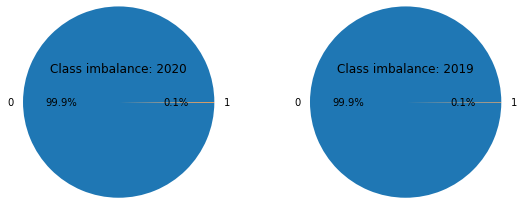

In [33]:
# analyze the balance of classes 


labels_pie = '0', '1 '


plt.subplot(1, 6, 1) # row 1, col 2 index 1
plt.title("Class imbalance: 2020")
plt.pie(y_test_scaled_men.value_counts(), autopct='%1.1f%%', labels=labels_pie, radius=5)




plt.subplot(1, 6, 6) # index 2
plt.title("Class imbalance: 2019")
plt.pie(y_train_scaled_men.value_counts(), autopct='%1.1f%%', labels=labels_pie, radius=5)


plt.show()

The same class imbalance issue is urgent for women, too. The below visuals demonstrate that for both 2019 and 2020.

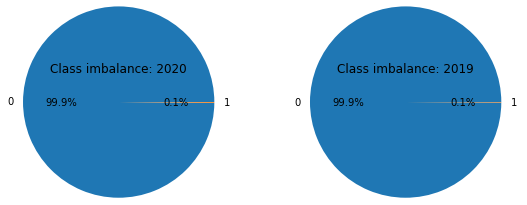

In [34]:
# analyze the balance of classes 


labels_pie = '0', '1 '


plt.subplot(1, 6, 1) # row 1, col 2 index 1
plt.pie(y_test_scaled_women.value_counts(), autopct='%1.1f%%', labels=labels_pie, radius=5)
plt.title("Class imbalance: 2020")


plt.subplot(1, 6, 6) # index 2
plt.pie(y_train_scaled_women.value_counts(), autopct='%1.1f%%', labels=labels_pie, radius=5)
plt.title("Class imbalance: 2019")

plt.show()

## Dealing with Class Imbalance 

A technique that we would like to use to deal with the problem is over-sampling, which is a simple and straightforward approach to deal with this sort of challenges. 

**RandomOverSampler** from the imblearn toolkit increases the number of samples in the target class by copying the existing class representatives.

There are other techniques, such as **SMOTE**, that create artificial class representatives and thus introduce more variety, but unless our chosen models can't handle the problem, we will avoid the unnecessary complexity of using advanced techniques for this seemingly easy challenge.

For the over-sampling task, we will attempt to bring the number of the positive class representatives to roughly the same level as the representatives of the negative class. That is regulated by applying the 'not majority' oversampling strategy to the train set.

We use this technique to balance the classes in Men and Women.

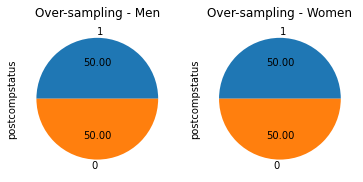

In [35]:
# oversampling - increasing the minority class - in train data sets

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='not majority') # increase 1s 

X_res_train_scaled_men, y_res_train_scaled_men = ros.fit_resample(X_train_scaled_men, y_train_scaled_men)

X_res_train_scaled_women, y_res_train_scaled_women = ros.fit_resample(X_train_scaled_women, y_train_scaled_women)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
ax = y_res_train_scaled_men.value_counts().plot.pie(autopct='%.2f')
__ = ax.set_title("Over-sampling - Men")

plt.subplot(1, 2, 2) # index 2
ax = y_res_train_scaled_women.value_counts().plot.pie(autopct='%.2f')
__ = ax.set_title("Over-sampling - Women")



Now that the class imbalance has been eliminated, we can examine the final shapes of the data sets to understand what will be used in our models.

We are confident that there are no missing values nor are there any duplicates (as these have been dealt with at earlier stages).

Below is to demonstrate the shapes of the data sets that we deal with. We decided to present them in the form of a data frame for the convenience of the reader.

It is important to mention that further we will operate with resampled X and y train sets and not-resampled ('original') test sets. It is reflected below in the syntax of the code and the output data frame.

In [36]:
# examine the shape

list_men_shape = []
list_women_shape = []

men_shape = [X_test_scaled_men, y_test_scaled_men, X_res_train_scaled_men, y_res_train_scaled_men] #use resampled data for train sets
women_shape = [X_test_scaled_women, y_test_scaled_women, X_res_train_scaled_women, y_res_train_scaled_women ] #use resampled data for train sets

for i in men_shape:
  shape_shape_m = i.shape
  list_men_shape.append(shape_shape_m)

for i in women_shape:
  shape_shape_w = i.shape
  list_women_shape.append(shape_shape_w)

dummy_data_men = list_men_shape
dummy_data_women = list_women_shape

df_both = pd.DataFrame(['X_test (2020)', 'y_test (2020)', 'X_train (2019) resampled', 'y_train (2019) resampled'], columns = ['Set Type'])

df_shape_men = pd.DataFrame(dummy_data_men , columns = ['Rows_Men', 'Columns_Men'])
df_shape_women = pd.DataFrame(dummy_data_women, columns = ['Rows_Women', 'Columns_Women'])

all_dfs = [df_both, df_shape_men, df_shape_women]

df_both = pd.concat([df_both, df_shape_men.reindex(df_both.index), df_shape_women.reindex(df_both.index)], axis = 1)

df_both = df_both.fillna(1)

df_both[['Columns_Men', 'Columns_Women']] = df_both[['Columns_Men', 'Columns_Women']].astype(int)

print(df_both)


                   Set Type  Rows_Men  Columns_Men  Rows_Women  Columns_Women
0             X_test (2020)    133874           16       94157             16
1             y_test (2020)    133874            1       94157              1
2  X_train (2019) resampled    390754           16      292480             16
3  y_train (2019) resampled    390754            1      292480              1


The above shows that the train data sets for both men and women are larger than test ones, but are somewhat of a comparable magnitude. Feature data set, as expected, have 16 rows (and 1 in target data sets).

At this point, we are confident that the data is in good order and we are ready to perform modeling.

# Decision Trees

In the following part, we attempt to investigate whether a Decision Tree classifier can help us achieve a satisfying level of recall or a higher accuracy.

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth': list(range(2, 20,2)), 'min_samples_leaf': list(range(1,8, 2))} # optimize the ranges and the step sizes for the run-time of the machine and still get good results 
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_res_train_scaled_men, y_res_train_scaled_men)
grid_men = grid_search_cv.best_estimator_

grid_search_cv.fit(X_res_train_scaled_women, y_res_train_scaled_women)
grid_women = grid_search_cv.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [38]:
print(grid_men)
print(grid_women)

DecisionTreeClassifier(max_depth=16, min_samples_leaf=3, random_state=42)
DecisionTreeClassifier(max_depth=18, min_samples_leaf=3, random_state=42)


For the DT model, we ran a grid-search algorithm to identify the best-suited parameters. K-validation was performed based on 3 folds for each of 36 candidates, totaling 108 fits; we limited the leaf-parameter at 8 and the depth-parameter at 20 with reasonably small steps. 

As evidenced by the above, a good working set of hyper-parameters for the decision tree classifier for both men and women includes max_depth of 16 - for men and 18 for women (out of max 20 which we used as the max for the analysis) - and the min_sample_leaf of 3. It is not surprising that the machine believes that the increase in max depth leads to better classification results, which it should under regular circumstances, and the min_sample_leaf's effect is hard to define. In this case, the minimum number seems to work the best. 

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

# the ideal models 

grid_men.fit(X_res_train_scaled_men, y_res_train_scaled_men)
grid_women.fit(X_res_train_scaled_women, y_res_train_scaled_women)

print(f'Train accuracy score - train set - men: {grid_men.score(X_res_train_scaled_men, y_res_train_scaled_men):.3f}')
print(f'Train accuracy score - train set - women: {grid_women.score(X_res_train_scaled_women, y_res_train_scaled_women):.3f}')

print(classification_report(y_test_scaled_men, grid_men.predict(X_test_scaled_men) ))
print(confusion_matrix(y_test_scaled_men, grid_men.predict(X_test_scaled_men) ))

print(classification_report(y_test_scaled_women, grid_women.predict(X_test_scaled_women) ))
print(confusion_matrix(y_test_scaled_women, grid_women.predict(X_test_scaled_women) ))


Train accuracy score - train set - men: 0.996
Train accuracy score - train set - women: 0.997
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    133737
           1       0.00      0.01      0.00       137

    accuracy                           0.99    133874
   macro avg       0.50      0.50      0.50    133874
weighted avg       1.00      0.99      0.99    133874

[[132243   1494]
 [   135      2]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     94030
           1       0.00      0.00      0.00       127

    accuracy                           0.99     94157
   macro avg       0.50      0.49      0.50     94157
weighted avg       1.00      0.99      0.99     94157

[[92902  1128]
 [  127     0]]


However, regardless of all our effort in optimizing hyper-parameters, we cannot achieve any meaningful classification results for class 1 for either men or women. It can be so due to the lack of variables. Although, the recall of the negative parameter is exceptionally hight, we cannot trust this model to perform sufficiently well on a different set of test data, because of the significant class imbalance in the test data. 

The best recall we’ve achieved is 1% for men and 0% for women.

At this point, we predict that Random Forests will perform poorly, as well, because they are based on DTs, and since our DTs seem to be a bad fit for modeling this data, RFs will not perform well either. Therefore, we will not attempt to use them for this challenge.

# KNN model

Having been frustrated by the results of the DT performance, we decided to try one more algorithm to predict the athletes that would be allowed to participate in the Games.

The algorithm that we'd like to try is KNN. Because KNN is computationally heavy, it would be impossible to identify the best number of neighbors for the prediction purposes by running the algorithm on the entire test set multiple times.

To make our life easier, we will create a sample equal to 10% of the test set, and we will select the best number of neighbors based on that sample.

For the selection of the number of neighbors, we will only use the men data set. Men and women data sets are similar to each other, so we believe that using the neighbors' number selected based on the men set is also going to be valid for the women set.

Once the parameter is identified, we will apply it to the entire test set and check how well the model will predict the athletes of class 1. 

In [40]:
# import the packages 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [41]:
# create 0.1 sampels 

sample_men_2019202 = men_20192020.sample(frac=.1, random_state = 23)

X_test_scaled_men_sample = (sample_men_2019202[sample_men_2019202['Year'] == 2020].drop(columns=['affiliateid', 'Year', 'postcompstatus'])).reset_index(drop=True)
y_test_scaled_men_sample = (sample_men_2019202[sample_men_2019202['Year'] == 2020]['postcompstatus'])
y_test_scaled_men_sample.index = X_test_scaled_men_sample.index #force the indexes of the features and target equal each other

In [42]:
# optimize KNN - for men 

#(inspired by and borrowed from https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb)

error_rate = []
acc_rate = []
recall_KNN = []

for i in range(1,21,2):
  print(f"Working on my model with {i} neighbours...", end="\r") 
  knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
  knn.fit(X_res_train_scaled_men, y_res_train_scaled_men)
  pred_i = knn.predict(X_test_scaled_men_sample)
  error_rate.append(np.mean(pred_i != y_test_scaled_men_sample))
  acc_rate.append(accuracy_score(y_test_scaled_men_sample, pred_i))
  recall_KNN.append(recall_score(y_test_scaled_men_sample, pred_i, average='binary'))

Minimum error: 0.001651031894934334 at K = 0


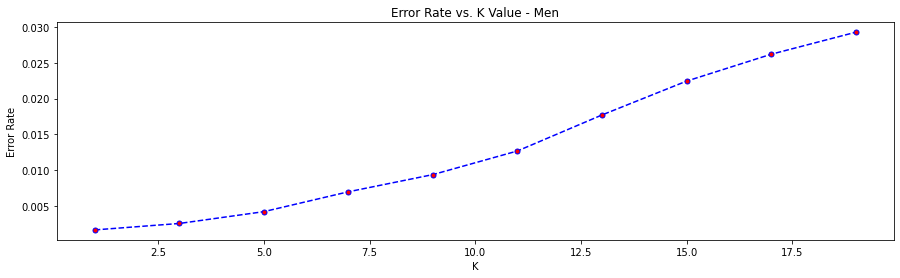

In [43]:
plt.figure(figsize=(15,4))
plt.plot(range(1,21,2),error_rate,color='blue', linestyle='dashed', 
         marker='.',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value - Men')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))

**Observation:**

The error rate infinitely increases as the K grows, which indicates that the model doesn't generalize well.


Maximum accuracy: 0.9983489681050657 at K = 0


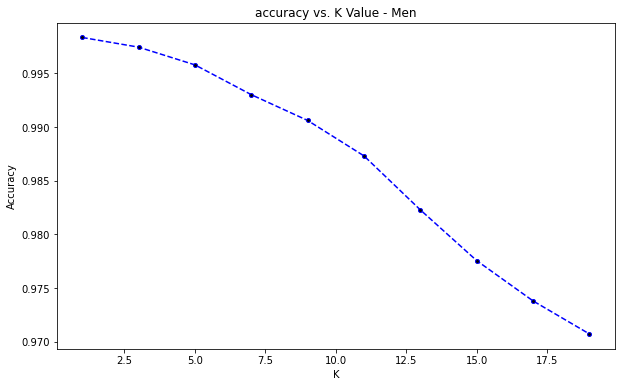

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21,2),acc_rate,color = 'blue',linestyle='dashed', 
         marker='.',markerfacecolor='black', markersize=8)
plt.title('accuracy vs. K Value - Men')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc_rate),"at K =",acc_rate.index(max(acc_rate)))

**Observation:**

As expected, the accuracy rate doesn't show much, as the highest accuracy close to 1.0 is detected at 0 neighbors, which proves the point that an accuracy rate is a meaningless metric for this type of data.


Maximum recall: 0.15384615384615385 at K = 4


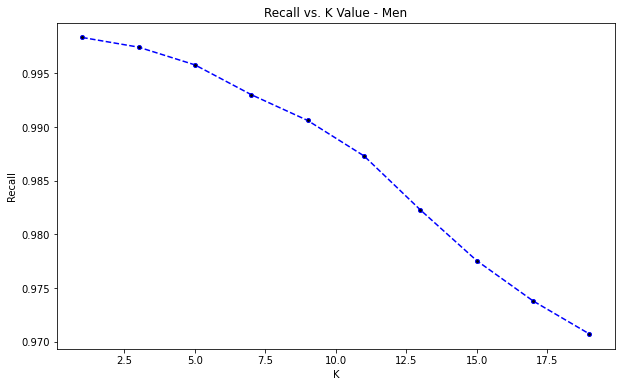

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21,2),acc_rate,color = 'blue',linestyle='dashed', 
         marker='.',markerfacecolor='black', markersize=8)
plt.title('Recall vs. K Value - Men')
plt.xlabel('K')
plt.ylabel('Recall')
print("Maximum recall:",max(recall_KNN),"at K =",recall_KNN.index(max(recall_KNN)))

Based on the accuracy scores that we observed, and also taking into account the error rate, we believe that the best hyper-parameters for the KNN models will be respectively: 

(Note, that due to a high degree of similarity between the two data sets, we will use the same parameters for men and women).

- Men: n_neighbours - 3 
- Women: n_neighbours - 3

We cannot use 0 neighbours because it defies the idea behind KNN, and 3 is reasonable for most types of data.

Based on these parameters, we will build 'ideal models'.


In [46]:
# Instantiate the model & fit it to our data

KNN_model_men = KNeighborsClassifier(n_neighbors=3) #men 
KNN_model_men.fit(X_res_train_scaled_men, y_res_train_scaled_men)

KNN_model_women = KNeighborsClassifier(n_neighbors=3) #women 
KNN_model_women.fit(X_res_train_scaled_women, y_res_train_scaled_women)

# Score the model on the test set

test_predictions_KNN_men = KNN_model_men.predict(X_test_scaled_men) # men
test_accuracy_KNN_men = accuracy_score(test_predictions_KNN_men, y_test_scaled_men)
print(f"Test set accuracy - men: {test_accuracy_KNN_men}")

test_predictions_KNN_women = KNN_model_women.predict(X_test_scaled_women) #women 
test_accuracy_KNN_women = accuracy_score(test_predictions_KNN_women, y_test_scaled_women)
print(f"Test set accuracy - women: {test_accuracy_KNN_women}")

Test set accuracy - men: 0.9976993292200128
Test set accuracy - women: 0.998353813311809


In [47]:
# classification report and confusion matrix for men - KNN

print(classification_report(y_test_scaled_men, test_predictions_KNN_men ))
print(confusion_matrix(y_test_scaled_men, test_predictions_KNN_men ))

# classification report and confusion matrix for women - KNN

print(classification_report(y_test_scaled_women, test_predictions_KNN_women))
print(confusion_matrix(y_test_scaled_women, test_predictions_KNN_women ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    133737
           1       0.02      0.02      0.02       137

    accuracy                           1.00    133874
   macro avg       0.51      0.51      0.51    133874
weighted avg       1.00      1.00      1.00    133874

[[133563    174]
 [   134      3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94030
           1       0.25      0.11      0.15       127

    accuracy                           1.00     94157
   macro avg       0.62      0.55      0.58     94157
weighted avg       1.00      1.00      1.00     94157

[[93988    42]
 [  113    14]]


We tried using a KNN model to select the athletes that would be accepted to the games, but due to the large class imbalance, the model was unable to deliver the recall at any meaningful level that would be satisfying for us. For men, we achieved a recall of 2%, and for women – 11%. We noticed that the error-rate infinitely increases in this model following the increase in the number of Ks, which indicates that the model doesn't generalize well. As expected, the accuracy rate doesn't show much, as the highest accuracy close to 1.0 is detected at 0 neighbours, which proves the point that an accuracy rate is a futile metric for analysing this type of data. As evidenced by our attempts, a KNN model due to its properties won’t allow us to achieve the objective.

Although we used a 10% sample of the training dataset to optimize the number of neighbours due to the computational heaviness of the algorithm, we believe choosing a larger sample, or potentially, using the entire dataset for the k-selection purposes, wouldn’t have had any meaningful impact on the performance of the model. 


**Observation:**
- KNN didn't work very well.
- Decision trees didn't work well.

Therefore, we will continue working with logistic regression. We will use a logistic regression model to describe a profile of the best male and female athletes that have the best chance to get to the games. 

# Logistic Regression

To start, we'd like to see how well a logistic regression will be able to tackle the challenge of selecting the representatives of the positive class.

It is important to mention that the desired outcome is to achieve a high recall. A high recall in our case may be any value in the upper quintile (top 20%). It seems to be a value large enough to indicate that the model selected the true positives not by chance. 

The empirical justification for setting the 80%+ threshold for the recall parameter can be found in education. Across various  disciplines, 80%+ score would be considered the lower threshold for either a good or an excellent grade.  

In [48]:
# load packages 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

At the modeling stage, we want to identify the best C-parameter to be able to create the best models possible respectively for men and women. The below demonstrates that.

We start with creating empty lists that would be populated by recall, train and test scores. We chose the range from 1 to 1000 (as a scaled equivalent of 0.001 to 1) to satisfy the conditions of the range function. Then, we run the regression model 20 times for men and women with a C-parameter step-size of 50 that was chosen to be small enough to demonstrate the evolution of recall, but not too small to make this exercise too computationally expensive.

In [103]:
recall_log_model_men = []
train_score_men = []
test_score_men = []

recall_log_model_women = []
train_score_women = []
test_score_women = []

step_size = 50

for c_c in range(1, 1001,step_size): # parameter C in logreg multiplied by 1000 to express it as an int (otherwise we can't use the range function for this)
    print(f'Working on my model at {c_c} regularization level (C)...', end='\r')
    #men
    log_model_men = LogisticRegression(max_iter=1000, C=c_c/1000) # converting the c_c value to float 
    log_model_men.fit(X_res_train_scaled_men, y_res_train_scaled_men)
    #women
    log_model_women = LogisticRegression(max_iter=1000, C=c_c/1000) # converting the c_c value to float 
    log_model_women.fit(X_res_train_scaled_women, y_res_train_scaled_women)

    #log_model_train_score = log_model.score(X_res_train_scaled_men, y_res_train_scaled_men)
    #print(f'Accuracy score for the logistic regression (men): {log_model_train_score:.3f}')
    #men
    y_pred_log_model_men = log_model_men.predict(X_test_scaled_men)
    recall_log_model1_men = recall_score(y_test_scaled_men, y_pred_log_model_men, average='binary')
    recall_log_model_men.append(round(recall_log_model1_men,4))
    #women
    y_pred_log_model_women = log_model_women.predict(X_test_scaled_women)
    recall_log_model1_women = recall_score(y_test_scaled_women, y_pred_log_model_women, average='binary')
    recall_log_model_women.append(round(recall_log_model1_women,4))
    
    #print(classification_report(y_test_scaled_men, y_pred_log_model))
    #confusion_matrix(y_test_scaled_men, y_pred_log_model)
    #men
    tr_score_men = log_model_men.score(X_res_train_scaled_men, y_res_train_scaled_men)
    train_score_men.append(tr_score_men)
    t_score_men = log_model_men.score(X_test_scaled_men, y_test_scaled_men)
    test_score_men.append(t_score_men) 
    #women
    tr_score_women = log_model_women.score(X_res_train_scaled_women, y_res_train_scaled_women)
    train_score_women.append(tr_score_women)
    t_score_women = log_model_women.score(X_test_scaled_women, y_test_scaled_women)
    test_score_women.append(t_score_women) 

Using simple calculations we are able to estimate what the maximum possible recall is that can be achieved using the model for men and women. It appears to be close to ~0.98 for men and ~0.94 for women (see below).

In [50]:
print(f'Max recall for men: {max(recall_log_model_men)}')
print(f'Max recall for women: {max(recall_log_model_women)}')

Max recall for men: 0.9781
Max recall for women: 0.937


Using a plot, we can visually inspect how the value of recall changes depending on the C-parameter. Apparently, the highest recall is achieved at the highest regularization level of 0.001 (one thousandth) for both genders. 

Surprisingly, the dynamics of recall ratios for men and women is different. Both achieve the highest recall at the lowest C-parameter (0.001), but the recall for men won't drop below ~85%, while that for women drops sharply from ~94% to ~70% as regularization loosens and continues dropping to as low as ~60%. 

Below we show two plots for men and women respectively that visually demonstrate our points.

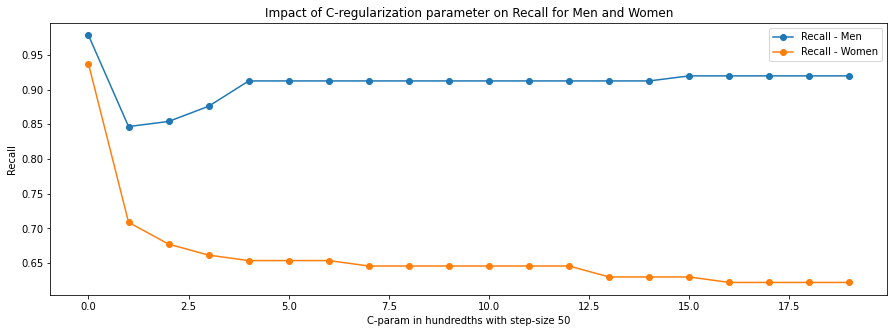

In [51]:
# plot the test and train scores - men

plt.figure(figsize=(15,5))
plt.plot(recall_log_model_men, marker = 'o', label = 'Recall - Men')
plt.plot(recall_log_model_women, marker = 'o', label = 'Recall - Women')
plt.title('Impact of C-regularization parameter on Recall for Men and Women')
plt.legend()
plt.xlabel('C-param in hundredths with step-size 50')
plt.ylabel('Recall')
plt.show()


Considering this, we will build models (for men and women) with the best regularization parameter (C = 0.001) and analyze them to understand what features contribute the most to the chances of athletes to be selected for the Games.

In [52]:
  # best models for men and women
    
  log_model_men = LogisticRegression(max_iter=1000, C=0.001) # converting the c_c value to float 
  log_model_women = LogisticRegression(max_iter=1000, C=0.001) # converting the c_c value to float 
  log_model_men.fit(X_res_train_scaled_men, y_res_train_scaled_men)
  log_model_women.fit(X_res_train_scaled_women, y_res_train_scaled_women)

  log_model_train_score_men = log_model_men.score(X_res_train_scaled_men, y_res_train_scaled_men)
  log_model_train_score_women = log_model_women.score(X_res_train_scaled_women, y_res_train_scaled_women)
  print(f'Accuracy score for the logistic regression - train score - (men): {log_model_train_score_men:.3f}')
  print(f'Accuracy score for the logistic regression - train score - (women): {log_model_train_score_women:.3f}')

Accuracy score for the logistic regression - train score - (men): 0.951
Accuracy score for the logistic regression - train score - (women): 0.942


We've achieved incredibly high train score (95.1% for men and 94.2% for women). But we cannot trust the accuracy scores as applied to this model, because of the enormous class imbalance in the test set. In the test phase, the accuracy drops dramatically.

Logistic Regression - Classification Report - Men
              precision    recall  f1-score   support

           0       1.00      0.58      0.73    133737
           1       0.00      0.98      0.00       137

    accuracy                           0.58    133874
   macro avg       0.50      0.78      0.37    133874
weighted avg       1.00      0.58      0.73    133874



Text(0.5, 15.0, 'Predicted label')

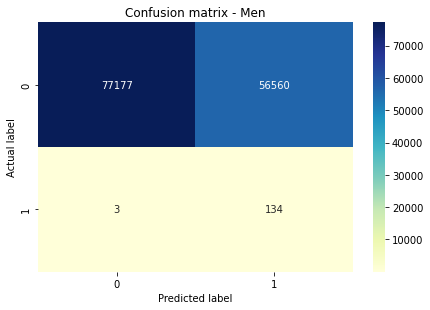

In [53]:
# confusion matrix 

y_pred_log_model_men = log_model_men.predict(X_test_scaled_men)
y_pred_log_model_women = log_model_women.predict(X_test_scaled_women)
# recall_log_model1_men = recall_score(y_test_scaled_men, y_pred_log_model_men, average='binary')
# recall_log_model1_women = recall_score(y_test_scaled_women, y_pred_log_model_women, average='binary')

print('Logistic Regression - Classification Report - Men')   
print(classification_report(y_test_scaled_men, y_pred_log_model_men))


# create heatmap (using https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python for inspiration)

import seaborn as sns 

# heatmap - men

sns.heatmap(pd.DataFrame( confusion_matrix(y_test_scaled_men, y_pred_log_model_men)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix - Men')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The above confusion matrix (men) demonstrates that our logistic regression was able to pick up 98% of the class 1 male representatives. It was done at the cost of little accuracy with 56560 thousand false positive picks (42%), but since we don't optimize for accuracy, we aren't worried about this.

Logistic Regression - Classification Report - Women
              precision    recall  f1-score   support

           0       1.00      0.54      0.70     94030
           1       0.00      0.94      0.01       127

    accuracy                           0.54     94157
   macro avg       0.50      0.74      0.36     94157
weighted avg       1.00      0.54      0.70     94157



Text(0.5, 15.0, 'Predicted label')

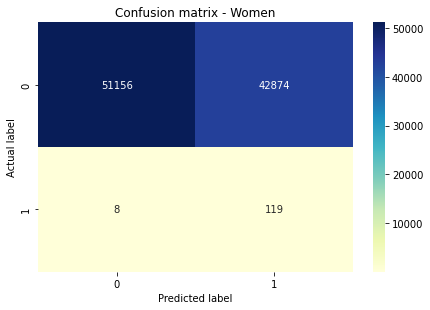

In [54]:
# classification report and heatmap for women

print('Logistic Regression - Classification Report - Women')   
print(classification_report(y_test_scaled_women, y_pred_log_model_women))

# heatmap - women

sns.heatmap(pd.DataFrame( confusion_matrix(y_test_scaled_women, y_pred_log_model_women)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix - Women')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


We've been able to pick 94% of women class 1 representatives, but even at a lower accuracy (54% for women vs. 58% for men).



The best logistic regression is capable of selecting ~98% of the representatives of the positive class - the athletes that will get to the games, but it does it with an excruciatingly low accuracy, which implies (of all the athletes that the model identified as positive class, 56,560 were FP, while 134 were TP (the intersection of 1 predicted and 1 actual labels). The number of FN is just 3. For women, we have 8 FN and 42,874 FP.

Is this a good outcome? The judgment on that depends on whether we want to stick with our original proposition that success would be claimed if the recall ratio is above 80%. This is indeed the case here, but at the same time - we are not entire happy with the 'almost absent' precision. However, this seems to be as good as it can be.

We'd like to stipulate once again that we are not concerned with the accuracy rate for this model due to a drastic class imbalance. 

# **Statistical Profiling of Athletes** 

## Refine the Logistic Regression Model

### Analyze the correlations and perform logistic regression

To refine our model and try and improve it, we will try to evaluate which of the coefficients are statistically significant. To do so, we fist see which variables are highly correlated, and iteratively start adding features to the logistic regression until we understand what variables should remain in the final version. 

Let's plot below a correlation matrix.

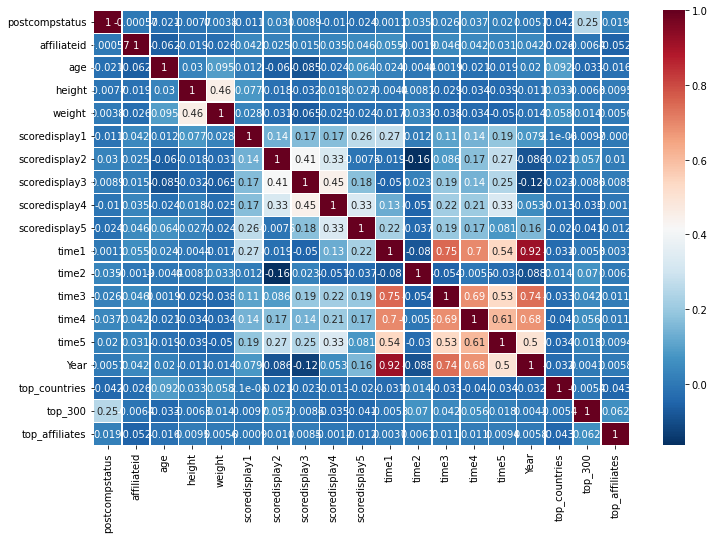

In [55]:
# heat map of correlations

men_corr = men_20192020.corr()

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(men_corr, 
            xticklabels=men_corr.columns,
            yticklabels=men_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

The above visualization shows that there is a very large level of correlation between the time metrics, which is understandable because a high / low performer is expected to demonstrate consistently high or low results, which explains the level of correlation. The rest of the correlations seem to be below 50%, which may be deemed as less significant. The correlation between Year and other features is irrelevant because Year is a technical column and will be removed once we split the data into sets again. 

Of all the features, the most troublesome and causing problems with running a regression seems to be 'time1'. We identified it while iterating through the features, and we came to realize that the removal of 'time1' solves the problem. 

It caused issues because Event 1 (for which time1 is presented) is not a timed event, and it happened so that the zero in the time1 column almost always coincided with the zero in the target (>99% cases), which caused technical issues, and it is also highly correlated with the rest of the time features, causing multicollinearity. Therefore, by dropping 'time1', we fix the problem and let the model run flawlessly.

In [56]:
# ['age', 'height', 'weight', 'scoredisplay1', 'scoredisplay2', 'scoredisplay3', 'scoredisplay4', 'scoredisplay5', 'time1', 'time2', 'time3', 'time4', 'time5', 'top_countries', 'top_300', 'top_affiliates']

x = X_res_train_scaled_men.drop(columns = ['time1'])
y = y_res_train_scaled_men

The next step of the analysis is to run a regression in the statsmodels and figure out if there are any statistically insignificant features. We have come to realize that there is none - all of the remaining features are statistically significant based on the p-values from the summary of the regression.

In [57]:
import statsmodels.api as sm

x_withconstant_linear = sm.add_constant(x)

# 1. Instantiate Model
linear_model = sm.Logit(y, x_withconstant_linear)

# 2. Fit Model (this returns a seperate object with the parameters)
x_withconstant_linear_results = linear_model.fit()

# Looking at the summary
x_withconstant_linear_results.summary()

Optimization terminated successfully.
         Current function value: 0.096600
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         postcompstatus   No. Observations:               390754
Model:                          Logit   Df Residuals:                   390738
Method:                           MLE   Df Model:                           15
Date:                Sun, 05 Dec 2021   Pseudo R-squ.:                  0.8606
Time:                        19:15:58   Log-Likelihood:                -37747.
converged:                       True   LL-Null:                   -2.7085e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -15.7023      0.189    -83.211      0.000     -16.072     -15.332
age               -0.6215      0.071     -8.795      0.000      -0.760      -0.483
height            -2.5236      0.191    -13.206      0.000      -2.898      -2.149
weight            -1.3678      0.119    -11.450      0.000      -1.602      -1.134
scoredisplay1      6.0815      0.149     40.692      0.000       5.789       6.374
scoredisplay2     -0.2419      0.080     -3.025      0.002      -0.399      -0.085
scoredisplay3     10.6763      0.138     77.274      0.000      10.406      10.947
scoredisplay4      7.8099      0.146     53.346      0.000       7.523       8.097
scoredisplay5      2.3180      0.076     30.648      0.000       2.170       2.466
time2             -0.2663      0.126     -2.109      0.035      -0.514      -0.019
time3             10.3773      0.159     65.414      0.000      10.066      10.688
time4              8.3678      0.140     59.745      0.000       8.093       8.642
time5              2.4802      0.070     35.332      0.000       2.343       2.618
top_countries     -5.5224      0.031   -177.707      0.000      -5.583      -5.461
top_300            7.9010      0.129     61.355      0.000       7.649       8.153
top_affiliates    -0.9814      0.082    -11.913      0.000      -1.143      -0.820
==================================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

We come to the same set of conclusions when analyzing the women data set. Here, we also drop the 'time1' column. 

In [58]:
# ['age', 'height', 'weight', 'scoredisplay1', 'scoredisplay2', 'scoredisplay3', 'scoredisplay4', 'scoredisplay5', 'time1', 'time2', 'time3', 'time4', 'time5', 'top_countries', 'top_300', 'top_affiliates']

x = X_res_train_scaled_women.drop(columns = ['time1'])
y = y_res_train_scaled_women

Then, we build a logistic regression for women, and we come to realize that the coefficients are statistically significant, i.e., p-values are less than 0.05. 

In [59]:
import statsmodels.api as sm

x_withconstant_linear = sm.add_constant(x)

# 1. Instantiate Model
linear_model = sm.Logit(y, x_withconstant_linear)

# 2. Fit Model (this returns a seperate object with the parameters)
x_withconstant_linear_results = linear_model.fit()

# Looking at the summary
x_withconstant_linear_results.summary()

Optimization terminated successfully.
         Current function value: 0.085045
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         postcompstatus   No. Observations:               292480
Model:                          Logit   Df Residuals:                   292464
Method:                           MLE   Df Model:                           15
Date:                Sun, 05 Dec 2021   Pseudo R-squ.:                  0.8773
Time:                        19:16:00   Log-Likelihood:                -24874.
converged:                       True   LL-Null:                   -2.0273e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.2924      0.131    -55.752      0.000      -7.549      -7.036
age                1.7950      0.075     23.995      0.000       1.648       1.942
height           -19.6023      0.244    -80.263      0.000     -20.081     -19.124
weight             3.4688      0.117     29.714      0.000       3.240       3.698
scoredisplay1     17.5229      0.221     79.177      0.000      17.089      17.957
scoredisplay2     -2.5387      0.090    -28.120      0.000      -2.716      -2.362
scoredisplay3      3.1492      0.144     21.864      0.000       2.867       3.431
scoredisplay4      5.9749      0.115     52.110      0.000       5.750       6.200
scoredisplay5      1.4064      0.055     25.579      0.000       1.299       1.514
time2             -3.1946      0.147    -21.708      0.000      -3.483      -2.906
time3              4.4072      0.209     21.046      0.000       3.997       4.818
time4              5.4011      0.115     47.058      0.000       5.176       5.626
time5              0.4228      0.065      6.476      0.000       0.295       0.551
top_countries    -10.1204      0.169    -60.030      0.000     -10.451      -9.790
top_300           10.5081      0.212     49.661      0.000      10.093      10.923
top_affiliates    -1.7652      0.115    -15.319      0.000      -1.991      -1.539
==================================================================================

Possibly complete quasi-separation: A fraction 0.45 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Now we know that the multicollinearity problem was mostly due to 'time1' variable. Once we drop it, we see that the logistic regression results demonstrate high values for pseudo-R, and we also see that all the p-values are low for men and women, and it implies that we can rely on the coefficients. Let's drop 'time1' and analyze the model again, then perform PCA.

We have learned that the coefficients for both logistic regressions are significant and that both can be used for our purposes. However, what does it mean practically to us? It means that all of the features should be kept in place and can be used for creating machine learning models, which we will do later here down below.

In [60]:
data_data_data = [X_res_train_scaled_women, X_res_train_scaled_men, X_test_scaled_men, X_test_scaled_women]

for i in data_data_data:
  i.drop('time1', axis = 1, inplace = True)



We've seen that 'time1' is perfectly correlated with the target and other features. The degree of correlation is so high that it won't allow to perform a regression. Therefore, we decided to drop it and run a regression again. Now, the problem is fixed for both genders.

Down below, we will run a regression in sklearn based on the rescaled data for men and women. We will analyze the coefficients from the regressions, and build data frame containing those coefficients and the names of the features.

In [61]:
# produce a df from the coeff_ and the names of the features 

from sklearn import metrics

# best logistic regression model - men

log_model_best_men = LogisticRegression(max_iter=1000, C=0.0001) 
log_model_best_men.fit(X_res_train_scaled_men, y_res_train_scaled_men)

# best logistic regression model - women

log_model_best_women = LogisticRegression(max_iter=1000, C=0.0001) 
log_model_best_women.fit(X_res_train_scaled_women, y_res_train_scaled_women)

# create features: importance - from the Betas - men

importance_m = log_model_best_women.coef_
importance_m = importance_m.flatten()
l_importance_m = importance_m

# create features: importance - from the Betas - women 

importance_w = log_model_best_women.coef_
importance_w = importance_w.flatten()
l_importance_w = importance_w

# set up a df for further processing - men

some_df_m = pd.DataFrame(data=X_res_train_scaled_men, columns=X_res_train_scaled_men.columns) # create a df based on the scaled data

# set up a df for further processing - women

some_df_w = pd.DataFrame(data=X_res_train_scaled_women, columns=X_res_train_scaled_women.columns) # create a df based on the scaled data

# create features: features - from the names of the features - men

features_m = some_df_m.columns
l_features_m = features_m.tolist()

imp_fea_dict_m = {'importance_m':l_importance_m, 'feature_m':l_features_m } # dictionary for creating a df 

df_feature_importance_m = pd.DataFrame(imp_fea_dict_m) # assemble a df 

# create features: features - from the names of the features - women

features_w = some_df_w.columns
l_features_w = features_w.tolist()

imp_fea_dict_w = {'importance_w':l_importance_w, 'feature_w':l_features_w } # dictionary for creating a df 

df_feature_importance_w = pd.DataFrame(imp_fea_dict_w) # assemble a df 

Then, we sort the features by their relative importance and recreate the data frames.

In [62]:
from matplotlib.pyplot import figure
# men
df_pos_neg_m = df_feature_importance_m.sort_values(by='importance_m', ascending = False)
# women
df_pos_neg_w = df_feature_importance_w.sort_values(by='importance_w', ascending = False)


### Analyze the Features of the Logistic Regression Model

We can analyze the features for both men and women.

In [63]:
# Betas for men

df_pos_neg_m

,importance_m,feature_m
13,0.998139,top_300
10,0.901090,time4
3,0.701529,scoredisplay1
11,0.576595,time5
9,0.519655,time3
8,0.518183,time2
5,0.409377,scoredisplay3
4,0.274769,scoredisplay2
14,0.073136,top_affiliates
6,0.059198,scoredisplay4


In [64]:
# betas for women

df_pos_neg_w

,importance_w,feature_w
13,0.998139,top_300
10,0.901090,time4
3,0.701529,scoredisplay1
11,0.576595,time5
9,0.519655,time3
8,0.518183,time2
5,0.409377,scoredisplay3
4,0.274769,scoredisplay2
14,0.073136,top_affiliates
6,0.059198,scoredisplay4


It is important to note that the coefficients in the logistic regression produced by sklearn are different from the coefficients produced by logistic regression in statsmodels for a number of reasons: a) statsmodels includes a small regularization parameter which is set to 1, b) the sklearn regression is based on 2019 data only (train set) whilst the statsmodels regression is based on the entire dataset without being split into train/test. 

We believe that the statistical significance of the coefficients in the case of a statsmodels is equally valid for the test and train sets produced from the same dataset. 

Below, we plot the features by relative importance - for men and women, and we will analyze them separate hereinbelow.

<Figure size 432x288 with 0 Axes>

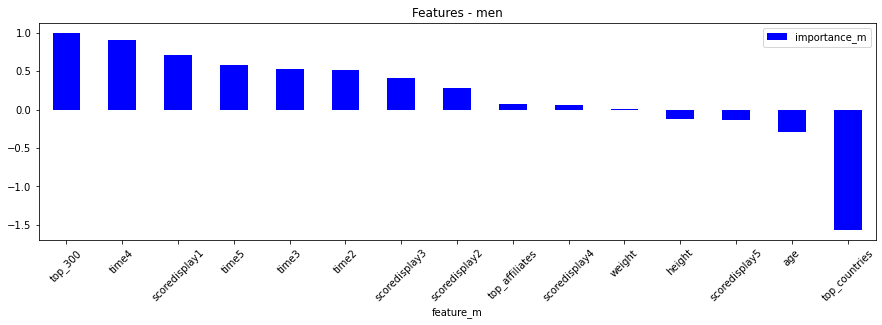

In [65]:
# make a plot - men
fig = plt.figure()
df_pos_neg_m.set_index('feature_m').plot(kind="bar", rot=45, color="blue", figsize=(15,4))
plt.title("Features - men")
plt.show()

<Figure size 432x288 with 0 Axes>

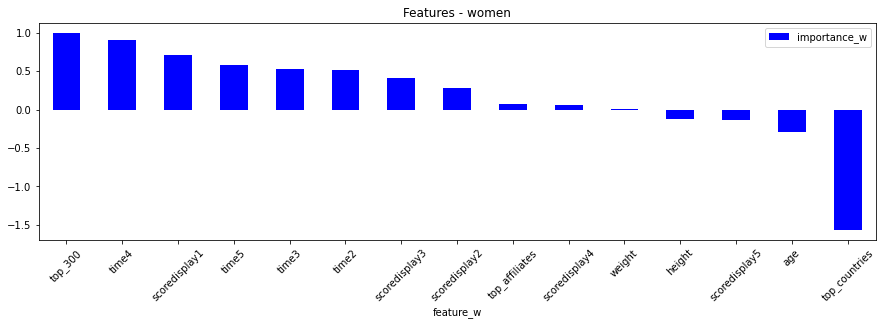

In [66]:
# make a plot - women
fig = plt.figure()
df_pos_neg_w.set_index('feature_w').plot(kind="bar", rot=45, color="blue", figsize=(15,4))
plt.title("Features - women")
plt.show()

**Analysis of the features for men and women - logistic regression.**

For both men and women, as witnessed by the above, the most impactful features for defining the 'successful' athletes are distributed as per the below:      
- top_300 - As always, previous performance is the best predictor of future performance.
- time4 - Workout 19.4 - the workout (for men) involves 3 rounds of 10 snatches, 12 bar-facing burpees, then, resting 3 minutes before continuing with 3 rounds of 10 bar muscle-ups, 12 bar-facing burpees. The w/o (here, 'workout') for women is a slightly different variation of the w/o for men, but with all the same exercises, varying mostly in weights. The time cap is 12 minutes. Statistically, the best time in this performance increases the chances to get accepted to the games.
- scoredisplay1 - Involves completing as many rounds as possible in 15 minutes of 19 wall-ball shots and 19-cal. rows. Good performance in this increases the chances significantly.
- time5 - The w/o consists of 33-27-21-15-9 reps for time of 65-lb. thrusters, chest-to-bar pull-ups, time cap 20 minutes (for men, and slightly fewer reps for women).
- time3 - For time, 200-ft. dumbbell overhead lunge, 50 dumbbell box step-ups, 50 strict handstand push-ups, 200-ft. handstand walk, 35-lb. dumbbell, 20-in. box. Time cap: 10 minutes.
-time2 - A complex training capped at 20 mins that involves varies combinations of toes-to-bars, double-unders, squat cleans, double-unders etc.
- Scoredisplay2 and scoredisplay3 also increase the chances of getting admitted to the game, because the evaluation of those workouts involves both the reps (score) and the time (the lower the better).
- top_affiliates - Training at a top_affiliate gym increases the chances to get to the games.
- weight - The regression seems to favour more people of a higher weight, but in this case what the algorithm likely captures is the muscle mass - a higher muscle mass indicates a higher level of fitness.

The factors that reduce the chances to get to the games are, predictably:    

- age 
- height
- scoredisplay 5 - Suprisingly, it reduces an athletes chance to get to the games, while the time for the same workout increases the chance. It happens because there is a fixed number of reps that athletes have to complete. Top athletes all complete the same number of reps and get the same scores, so the only thing that differentiates them is the time. Therefore, scoredisplay5 reduces the chances. For 'non-top' athletes, the number of reps (if it is below the requirement) will reduce their chances to get to the games even more. 
- top country - Being from one of the top countries reduces each individual athletes' chances to get to the Games due to the presence of high competition. Therefore, it's good to be from the US or Canada, because the winner may eventually be from one of those countries (as it has historically been), but it is also not good to be from the US or Canada, because it is more difficult to get through the open stage.

We can conclude that the height above a certain limit plays against a competitor, as well as older age. The younger athletes have a higher chance to get to the Games. 




## PCA 

Let's look at the dependency of explained variance on the number of PCs. We will set the threshold for the explained variance at 80%, as this threshold seems to be high enough to be meaningful but not too high to cause overfitting.

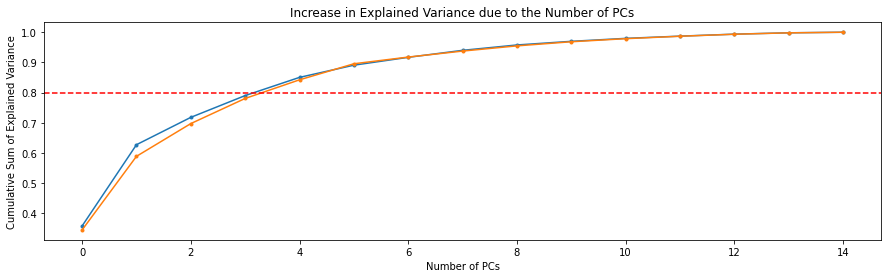

In [67]:
# PCA
from sklearn.decomposition import PCA

# choose the number of PCs fo men and women

men_pca = PCA()
women_pca = PCA()

men_pca.fit(X_res_train_scaled_men)
women_pca.fit(X_res_train_scaled_women)
X_res_train_scaled_men_PCA = men_pca.transform(X_res_train_scaled_men)
X_test_scaled_men_PCA = men_pca.transform(X_test_scaled_men)
X_res_train_scaled_women_PCA = women_pca.transform(X_res_train_scaled_women)
X_test_scaled_women_PCA = women_pca.transform(X_test_scaled_women)

# explained variance ration

expl_var_men = men_pca.explained_variance_ratio_
expl_var_women = women_pca.explained_variance_ratio_
# cumulative 

cumulative_sum_men = np.cumsum(expl_var_men)
cumulative_sum_women = np.cumsum(expl_var_women)

# plot the the cumulative sum graph

plt.figure(figsize=(15,4))
plt.plot(range(len(cumulative_sum_men)), cumulative_sum_men, marker = '.')
plt.plot(range(len(cumulative_sum_women)), cumulative_sum_women, marker = '.')
plt.axhline(0.80, c='r', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.title('Increase in Explained Variance due to the Number of PCs')
plt.xticks()
plt.show()

The above graph demonstrates that we are able to explain ~80% of variance with the number of PCs equal to ~3, which we will use further for building a new version of a linear regression model based on PCA data.

Now that we've established the validity of 3 components for the purposes of our regression, we will fit the data for both men and women and transform it for using in the regression.

In [68]:
# PCA
from sklearn.decomposition import PCA

#men

PCA_3_components_men = PCA(n_components=3)
PCA_3_components_men.fit(X_res_train_scaled_men)
X_res_train_scaled_men_PCA = PCA_3_components_men.transform(X_res_train_scaled_men)
X_test_scaled_men_PCA = PCA_3_components_men.transform(X_test_scaled_men)

#women 


PCA_3_components_women = PCA(n_components=3)
PCA_3_components_women.fit(X_res_train_scaled_women)
X_res_train_scaled_women_PCA = PCA_3_components_women.transform(X_res_train_scaled_women)
X_test_scaled_women_PCA = PCA_3_components_women.transform(X_test_scaled_women)

Let's run the regressions themselves, and check the results.

In [69]:
# rerun the logistic regression

# best logistic regression model - men

log_model_best_men_3 = LogisticRegression(max_iter=1000, C=0.0001) 
log_model_best_men_3.fit(X_res_train_scaled_men_PCA, y_res_train_scaled_men)

# best logistic regression model - women

log_model_best_women_3 = LogisticRegression(max_iter=1000, C=0.0001) 
log_model_best_women_3.fit(X_res_train_scaled_women_PCA, y_res_train_scaled_women)

LogisticRegression(C=0.0001, max_iter=1000)

The results of the regressions can be interpreted in many ways. As we've proclaimed before, we are interested only in the recall for the positive class, as we intend to be able to identify all the potential participants of the Games.

In [70]:
# scores - men

log_model_train_score_men_3 = log_model_best_men_3.score(X_res_train_scaled_men_PCA, y_res_train_scaled_men)
log_model_train_score_women_3 = log_model_best_women_3.score(X_res_train_scaled_women_PCA, y_res_train_scaled_women)
print(f'Accuracy score for the logistic regression - train score on PCA data - (men): {log_model_train_score_men_3:.3f}')
print(f'Accuracy score for the logistic regression - train score on PCA data - (women): {log_model_train_score_women_3:.3f}')

# confusion matrix 

y_pred_log_model_men_3 = log_model_best_men_3.predict(X_test_scaled_men_PCA)
y_pred_log_model_women_3 = log_model_best_women_3.predict(X_test_scaled_women_PCA)
# recall_log_model1_men = recall_score(y_test_scaled_men, y_pred_log_model_men, average='binary')
# recall_log_model1_women = recall_score(y_test_scaled_women, y_pred_log_model_women, average='binary')

print('Logistic Regression - Classification Report - PCA data - Men')   
print(classification_report(y_test_scaled_men, y_pred_log_model_men_3))

# classification report and heatmap for women

print('Logistic Regression - Classification Report - PCA - Women')   
print(classification_report(y_test_scaled_women, y_pred_log_model_women_3))

Accuracy score for the logistic regression - train score on PCA data - (men): 0.935
Accuracy score for the logistic regression - train score on PCA data - (women): 0.909
Logistic Regression - Classification Report - PCA data - Men
              precision    recall  f1-score   support

           0       1.00      0.73      0.85    133737
           1       0.00      0.99      0.01       137

    accuracy                           0.73    133874
   macro avg       0.50      0.86      0.43    133874
weighted avg       1.00      0.73      0.85    133874

Logistic Regression - Classification Report - PCA - Women
              precision    recall  f1-score   support

           0       1.00      0.76      0.86     94030
           1       0.01      0.97      0.01       127

    accuracy                           0.76     94157
   macro avg       0.50      0.86      0.44     94157
weighted avg       1.00      0.76      0.86     94157



As we have seen above, we were able to recall 99% of the male participants and 97% of the female participants. These are extraordinary results that we did not expect to achieve. 

Moreover, we have found the accuracy that began to seem more meaningful as it declined: 0.73 for men and .76 for women. 


Text(0.5, 15.0, 'Predicted label')

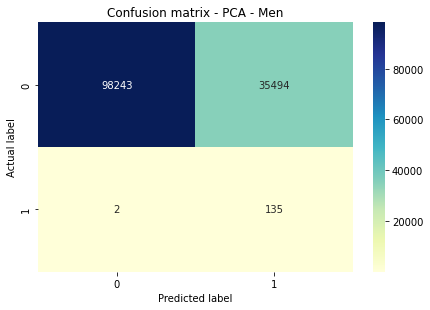

In [71]:
# create heatmap (using https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python for inspiration)

import seaborn as sns 

# heatmap - PCA - men

sns.heatmap(pd.DataFrame( confusion_matrix(y_test_scaled_men, y_pred_log_model_men_3)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix - PCA - Men')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Let's examine the **confusion matrix** for men. As we see, we were extremely successful in recalling the participants (135 selected vs. 2 left out). This success came with quite an error of ~35k false positive results. But we shall not let this fact deter us from further analysis as we know how to use this outcome for business purposes and we know how to potentially improve the accuracy (refer to 'Business Report' attached to this Notebook).

Text(0.5, 15.0, 'Predicted label')

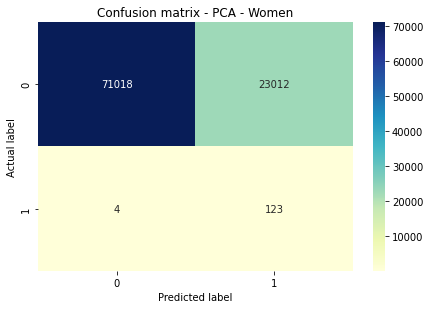

In [72]:
# heatmap - women

sns.heatmap(pd.DataFrame( confusion_matrix(y_test_scaled_women, y_pred_log_model_women_3)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix - PCA - Women')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The description of the **confusion matrix** for women shows the same patterns as that we brought for men. We've been able to select 123 participants and 4 actual participants were left out. Is that a good result? According to the metric that we defined for ourselves before we began the modeling - it is!

Can we visualize the decision boundaries for these logistic regressions? Let's download some important packages for visualization and do our magic.

The PCA involved splitting the data in 3 components, which are represented in the form of arrays. 

We will plot the three components against each other on a plain and highlight the positive class to see how it is being distributed depending on the combination of the components.

In [73]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


component_1_m = X_res_train_scaled_men_PCA[:,0]
component_2_m = X_res_train_scaled_men_PCA[:,1]
component_3_m = X_res_train_scaled_men_PCA[:,2]

component_1_w = X_res_train_scaled_women_PCA[:,0]
component_2_w = X_res_train_scaled_women_PCA[:,1]
component_3_w = X_res_train_scaled_women_PCA[:,2]

Now that we've separated all the components, we can use them as axes in the plain construction algorithm. 

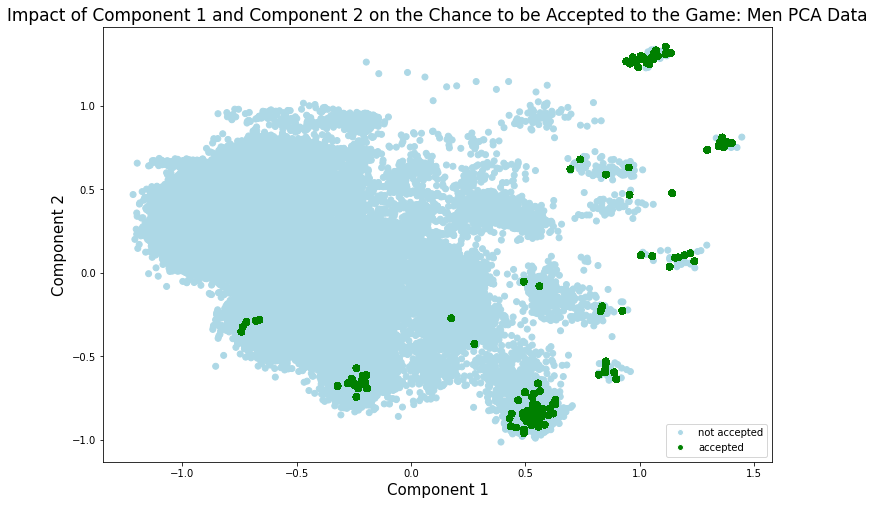

In [74]:
# creating a scatter plot to check if there are any patters in their placement and concentration by type - men

plt.figure(figsize=(12, 8))
x = component_1_m
y = component_2_m
status = y_res_train_scaled_men
colors = {0: 'lightblue' , 1: 'green'}

plt.title('Impact of Component 1 and Component 2 on the Chance to be Accepted to the Game: Men PCA Data', size = 17)


legend_elements = [Line2D([0], [0], marker='.', color='w', label='not accepted', markerfacecolor='lightblue', markersize=12),
                   Line2D([0], [0], marker='.', color='w', label='accepted', markerfacecolor='green', markersize=12)]


# Create the figure

plt.legend(handles=legend_elements, loc='lower right')

plt.xlabel('Component 1', size = 15)
plt.ylabel('Component 2', size = 15) 

plt.scatter(x, y, c=status.map(colors))
plt.show() # over humble chart 

The above graph demonstrates that an increase in chances to be selected for the Games is associated with higher levels of Component 1. We see that the values of Component 2 (vs. TP) are 'all over the place', which doesn't allow us to accurately define the impact of Component 2 on the chances to be selected, but it might indicate the PC2 reduces the said chances. But we can definitively ascertain that the positive values of Component 1, especially above 0.5 are highly associated with the increased chance of getting selected. 

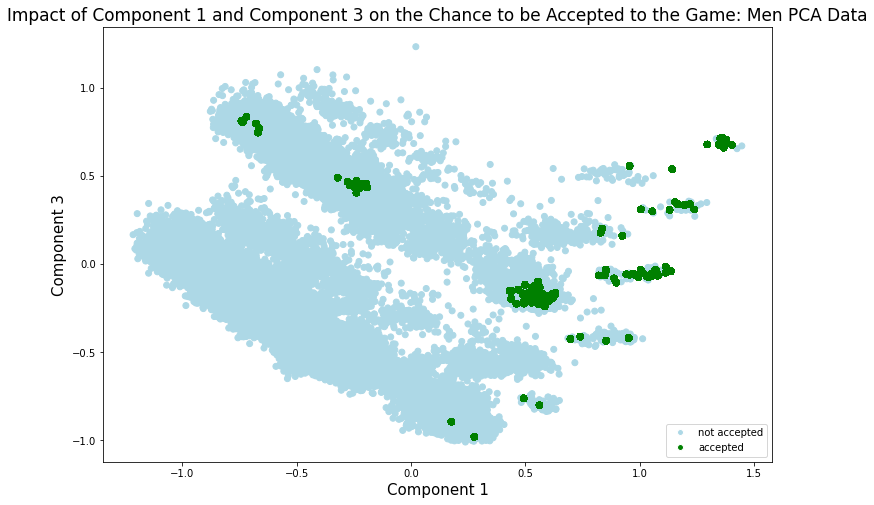

In [75]:
# creating a scatter plot to check if there are any patters in their placement and concentration by type

plt.figure(figsize=(12, 8))
x = component_1_m
y = component_3_m
status = y_res_train_scaled_men
colors = {0: 'lightblue' , 1: 'green'}

plt.title('Impact of Component 1 and Component 3 on the Chance to be Accepted to the Game: Men PCA Data', size = 17)


legend_elements = [Line2D([0], [0], marker='.', color='w', label='not accepted', markerfacecolor='lightblue', markersize=12),
                   Line2D([0], [0], marker='.', color='w', label='accepted', markerfacecolor='green', markersize=12)]


# Create the figure

plt.legend(handles=legend_elements, loc='lower right')

plt.xlabel('Component 1', size = 15)
plt.ylabel('Component 3', size = 15) 

plt.scatter(x, y, c=status.map(colors))
plt.show() # over humble chart 

When analyzing the impact of Component 1 and Component 3 together, we come to the similar conclusions as in the previous instance with Components 1 and 2. In this case, we see that the values of Component 1 being above 0.5 are clearly indicative of increased chances to be selected for the Games, while the values of Component 3 being in the range from (1 to -1) can be almost equally associated with chances to get to the games or not. Or in other words, Component 3 seems to have little to no impact (which is indeed the case, as we learn later). 

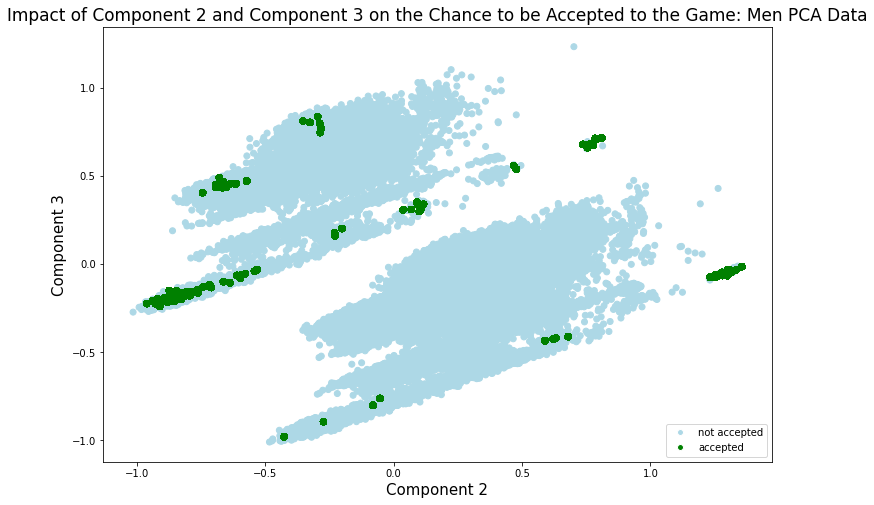

In [76]:
# creating a scatter plot to check if there are any patters in their placement and concentration by type

plt.figure(figsize=(12, 8))
x = component_2_m
y = component_3_m
status = y_res_train_scaled_men
colors = {0: 'lightblue' , 1: 'green'}

plt.title('Impact of Component 2 and Component 3 on the Chance to be Accepted to the Game: Men PCA Data', size = 17)


legend_elements = [Line2D([0], [0], marker='.', color='w', label='not accepted', markerfacecolor='lightblue', markersize=12),
                   Line2D([0], [0], marker='.', color='w', label='accepted', markerfacecolor='green', markersize=12)]


# Create the figure

plt.legend(handles=legend_elements, loc='lower right')

plt.xlabel('Component 2', size = 15)
plt.ylabel('Component 3', size = 15) 

plt.scatter(x, y, c=status.map(colors))
plt.show() # over humble chart 

The above graph shows a strong linear relationship between Component 2 and Component 3, as an increase in Component 2 seems to lead to an increase in Component 3, and the increase in both at the same time above -0.5 seems to be somewhat indicative of increased chances to get to the games. (As we learned later, they counteract each other, and the chances increase if PC3's weight is more).

Now, we will plot the same for women and see if the we might see similar patterns in that data.

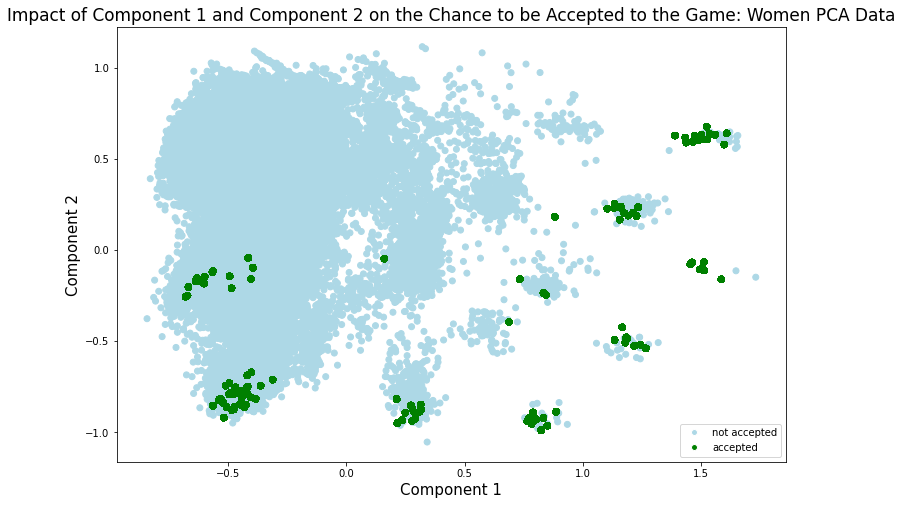

In [77]:
# creating a scatter plot to check if there are any patters in their placement and concentration by type - women 

plt.figure(figsize=(12, 8))
x = component_1_w
y = component_2_w
status = y_res_train_scaled_women
colors = {0: 'lightblue' , 1: 'green'}

plt.title('Impact of Component 1 and Component 2 on the Chance to be Accepted to the Game: Women PCA Data', size = 17)


legend_elements = [Line2D([0], [0], marker='.', color='w', label='not accepted', markerfacecolor='lightblue', markersize=12),
                   Line2D([0], [0], marker='.', color='w', label='accepted', markerfacecolor='green', markersize=12)]


# Create the figure

plt.legend(handles=legend_elements, loc='lower right')

plt.xlabel('Component 1', size = 15)
plt.ylabel('Component 2', size = 15) 

plt.scatter(x, y, c=status.map(colors))
plt.show() # over humble chart 

The above graph demonstrating the co-impact of PC1 and PC2 on the outcome is different from that for men. This graph shows that lower value for component 2 has a bigger impact on the chance of women to be selected for the games than Component 1, which is 'all over the place'. As we learn later, it is extremely important for women not to fall to far away from the mean, if they don't shine in some chance-increasing features. Then, they have a chance to get to the Games, should the value of PC2 be under control (= as low as possible).

Let's examine the same for Components 1 and 3 for women. 

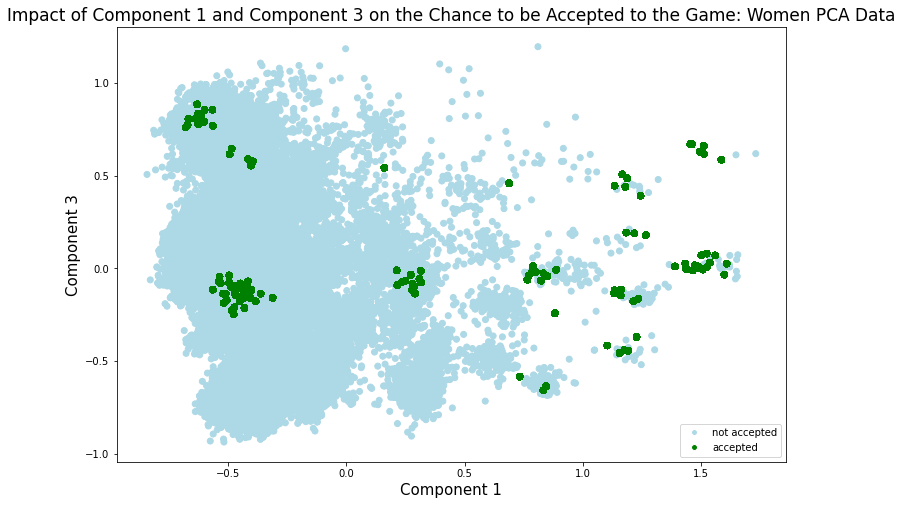

In [78]:
# creating a scatter plot to check if there are any patters in their placement and concentration by type - women 

plt.figure(figsize=(12, 8))
x = component_1_w
y = component_3_w
status = y_res_train_scaled_women
colors = {0: 'lightblue' , 1: 'green'}

plt.title('Impact of Component 1 and Component 3 on the Chance to be Accepted to the Game: Women PCA Data', size = 17)


legend_elements = [Line2D([0], [0], marker='.', color='w', label='not accepted', markerfacecolor='lightblue', markersize=12),
                   Line2D([0], [0], marker='.', color='w', label='accepted', markerfacecolor='green', markersize=12)]


# Create the figure

plt.legend(handles=legend_elements, loc='lower right')

plt.xlabel('Component 1', size = 15)
plt.ylabel('Component 3', size = 15) 

plt.scatter(x, y, c=status.map(colors))
plt.show() # over humble chart 

This picture allows us to conclude that the strongly positive or strongly negative values for Component 1 imply higher chances to be selected for the games for women, while Component 3 is somewhat less impactful, because there is no strict pattern to be observed how components three impacts the selection of the athletes.

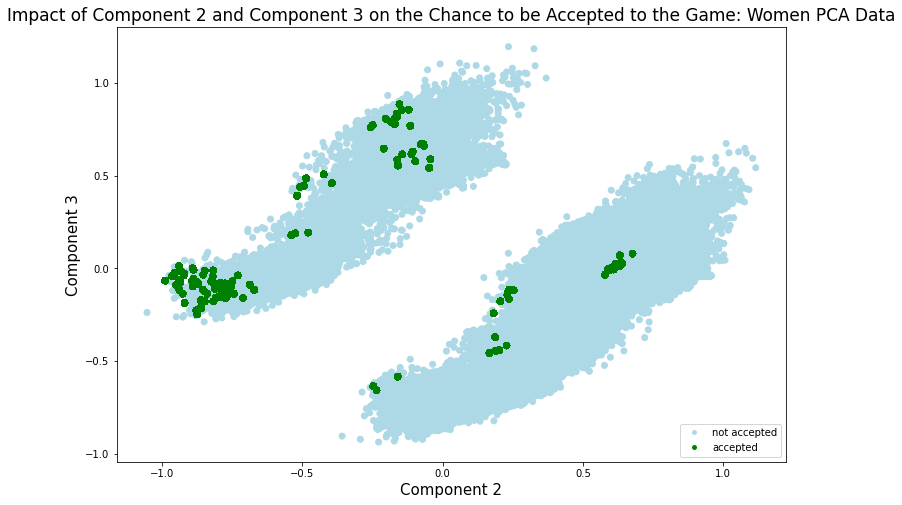

In [79]:
# creating a scatter plot to check if there are any patters in their placement and concentration by type - women 

plt.figure(figsize=(12, 8))
x = component_2_w
y = component_3_w
status = y_res_train_scaled_women
colors = {0: 'lightblue' , 1: 'green'}

plt.title('Impact of Component 2 and Component 3 on the Chance to be Accepted to the Game: Women PCA Data', size = 17)


legend_elements = [Line2D([0], [0], marker='.', color='w', label='not accepted', markerfacecolor='lightblue', markersize=12),
                   Line2D([0], [0], marker='.', color='w', label='accepted', markerfacecolor='green', markersize=12)]


# Create the figure

plt.legend(handles=legend_elements, loc='lower right')

plt.xlabel('Component 2', size = 15)
plt.ylabel('Component 3', size = 15) 

plt.scatter(x, y, c=status.map(colors))
plt.show() # over humble chart 

In the above picture, we observe the same pattern as for men, with a stronger chances to be selected for the Games for the athletes who are positive on Component 3 and positive on Component 2. Between the two components there is a strong linear relationship. But should PC3 outweigh PC2, ladies get a higher chance to get to the Games. 

**It is obvious that the athletes with similar patterns will cluster together.**

Let's analyze more deeply which features are the most important for the PCs.

We know that PCA is 'is an orthogonal transformation of the data into a series of uncorrelated data living in the reduced PCA space such that the first component explains the most variance in the data with each subsequent component explaining less.' Source: https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

The fact that PC1 seems to have the most predictive power is expected.


First, let's go back and examine the logistic regression coefficients based on the PCA data.

In [80]:
# log reg coef PCA men 

log_model_best_men_3.coef_

array([[ 2.39941539, -0.80188601,  0.62896129]])

In [81]:
# log reg PCA women

log_model_best_women_3.coef_

array([[ 1.42730635, -1.81931893,  0.63278962]])

The above demonstrates that the first PC in both logistic regressions has a high weight, but for women PC2 is more impactful than PC1, which is somewhat unusual. And it definitely impacts the most the athletes' chances to get to the games. The second component can be called the  'deterrent' as it reduces the chances, and the PC3 slightly improves the chances. The deterrent in the logistic regression for women seems to be extremely strong. That probably explains why the class 1 women representatives are somewhat more difficult to predict.

Logically, to improve the athletes' chances, they should maximize PC1 and PC3. This can be achieved by increasing the biggest positive loadings on the said components.

Let's look at how the variance is explained in the PCA.

In [82]:
# pca varience ratio - men

PCA_3_components_men.explained_variance_ratio_



array([0.35792065, 0.26931275, 0.09064095])

In [83]:
# pca varience ratio - women

PCA_3_components_women.explained_variance_ratio_

array([0.34476317, 0.2439295 , 0.10853555])

For both men and women, 40%+ of variance is explained by PC1 and PC3, while PC2 explains around a third. Based on this, we conclude that all PCs are equally important.

Let's look at the loadings (features) on the PCs.

1.   Importance for men
2.   Importance for women



In [84]:
# importance of components for men

PCA_3_components_men.components_

array([[-0.11081309, -0.01020282,  0.02172724,  0.19709832,  0.05300781,
        -0.05149816, -0.37142555, -0.29168996,  0.2543871 ,  0.30942941,
         0.50734967,  0.23806017, -0.30003533,  0.38842336,  0.06606876],
       [ 0.02814632,  0.01455654,  0.03501888, -0.02337745, -0.3887973 ,
        -0.3992176 , -0.03959058,  0.07474369,  0.32803099,  0.30832241,
        -0.14293071, -0.24485095,  0.53931087,  0.32138574,  0.04835055],
       [-0.00532649, -0.00779634, -0.04114672,  0.01620731, -0.21640131,
        -0.18930338,  0.36356721,  0.26667243,  0.15893062,  0.21453609,
        -0.28312821, -0.10437254, -0.72816577,  0.13873583,  0.01347629]])

In [85]:
# importance of components for men

PCA_3_components_women.components_

array([[-7.10803127e-02,  1.76178700e-03,  3.88216543e-02,
         1.53004986e-01, -1.00184038e-01, -9.70269041e-02,
        -3.66259927e-01, -2.01183053e-01,  3.33335505e-01,
         3.04650140e-01,  4.98680977e-01,  9.89038719e-02,
         2.64090337e-02,  5.53694154e-01,  7.93171432e-02],
       [ 6.96100297e-02,  2.52977692e-02,  2.44473353e-02,
        -1.34465434e-01, -3.53965663e-01, -3.23518436e-01,
        -1.25861761e-01,  1.65916976e-01,  8.65303396e-02,
         8.39693726e-02, -1.55422976e-01, -3.77100730e-01,
         7.21758281e-01, -2.55059584e-02,  5.01583018e-03],
       [-5.76492655e-02,  2.39420838e-04,  6.41712980e-03,
         1.79171420e-02, -3.23882405e-01, -9.77769804e-02,
        -4.52508121e-02,  4.80370339e-01,  1.52482048e-01,
         6.78348541e-02,  2.62982193e-05, -5.05858463e-01,
        -6.01650417e-01,  4.00404242e-02,  4.14640183e-02]])

We know that the shape of a PC is explained by [n_components, n_features]. 

Therefore, we see that for the said features, there are different loadings attached for the calculation of PCs. 

From the visual inspection of the above, we can conclude that it is possible to say which components are the most important for the maximization/minimization of PCs.

Source: https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

Let's remind ourselves which features we deal with. They are 14 in total and we have examined them before. 



In [86]:
# create a list from features 

features_features = df_feature_importance_w

In [87]:
features_features = features_features['feature_w'].tolist()

Let's print the list of the said features.

In [88]:
#list of features in the regression 

features_features

['age',
 'height',
 'weight',
 'scoredisplay1',
 'scoredisplay2',
 'scoredisplay3',
 'scoredisplay4',
 'scoredisplay5',
 'time2',
 'time3',
 'time4',
 'time5',
 'top_countries',
 'top_300',
 'top_affiliates']

Now, let's create lists containing the loadings (expressed in float numbers for each of the components for both genders) using the two above nested list of lists (components_).

We must look at the absolute values of the eigenvector components corresponding to the k largest eigenvalues. "In sklearn the components are sorted by explained variance. The larger they are, the more a specific feature contributes to that principal component." Source: https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

In [89]:
# extract lists from the array for each PCs.

# PC1 - men

list_PC1m = [-0.11081309, -0.01020282,  0.02172724,  0.19709832,  0.05300781,
        -0.05149816, -0.37142555, -0.29168996,  0.2543871 ,  0.30942941,
         0.50734967,  0.23806017, -0.30003533,  0.38842336,  0.06606876]

# PC2 - men

list_PC2m = [ 0.02814632,  0.01455654,  0.03501888, -0.02337745, -0.3887973 ,
        -0.3992176 , -0.03959058,  0.07474369,  0.32803099,  0.30832241,
        -0.1429307 , -0.24485095,  0.53931087,  0.32138574,  0.04835055]

# PC3 - men

list_PC3m = [-0.0053265 , -0.00779635, -0.04114673,  0.01620737, -0.21640128,
        -0.18930352,  0.36356725,  0.26667245,  0.15893066,  0.21453593,
        -0.28312816, -0.10437253, -0.72816577,  0.13873585,  0.01347629]

# PC1 - women

list_PC1w = [-7.10803127e-02,  1.76178711e-03,  3.88216544e-02,
         1.53004986e-01, -1.00184038e-01, -9.70269044e-02,
        -3.66259927e-01, -2.01183053e-01,  3.33335505e-01,
         3.04650140e-01,  4.98680977e-01,  9.89038719e-02,
         2.64090337e-02,  5.53694154e-01,  7.93171432e-02]

# PC2 - women

list_PC2w = [ 6.96100297e-02,  2.52977693e-02,  2.44473356e-02,
        -1.34465435e-01, -3.53965663e-01, -3.23518437e-01,
        -1.25861760e-01,  1.65916976e-01,  8.65303398e-02,
         8.39693719e-02, -1.55422975e-01, -3.77100730e-01,
         7.21758281e-01, -2.55059584e-02,  5.01583029e-03]

# PC3 - women

list_PC3w = [-5.76492591e-02,  2.39349693e-04,  6.41715241e-03,
         1.79171496e-02, -3.23882415e-01, -9.77767019e-02,
        -4.52510163e-02,  4.80370341e-01,  1.52482019e-01,
         6.78351857e-02,  2.60511302e-05, -5.05858459e-01,
        -6.01650418e-01,  4.00403943e-02,  4.14639946e-02]


Now, let's put them into data frames by zipping - we shall attach the loadings to the original features.

In [90]:
# create dfs for each PC demonstrating the importance of features 

# PC1 - men 

data_tuples = list(zip(features_features, list_PC1m))

pc1_features_m = pd.DataFrame(data_tuples, columns=['Feature PC1 m','Importance PC1 m'])

# PC2 - men 

data_tuples = list(zip(features_features, list_PC2m))

pc2_features_m = pd.DataFrame(data_tuples, columns=['Feature PC2 m','Importance PC2 m'])


# PC3 - men 

data_tuples = list(zip(features_features, list_PC3m))

pc3_features_m = pd.DataFrame(data_tuples, columns=['Feature PC3 m','Importance PC3 m'])

# PC1 - women 

data_tuples = list(zip(features_features, list_PC1w))

pc1_features_w = pd.DataFrame(data_tuples, columns=['Feature PC1 w','Importance PC1 w'])

# PC2 - women 

data_tuples = list(zip(features_features, list_PC2w))

pc2_features_w = pd.DataFrame(data_tuples, columns=['Feature PC2 w','Importance PC2 w'])


# PC3 - women 

data_tuples = list(zip(features_features, list_PC3w))

pc3_features_w = pd.DataFrame(data_tuples, columns=['Feature PC3 w','Importance PC3 w'])


Now, let's visualize the 'relative importance' of each of the features for both genders sorting from the most impactful to the least impactful. 

PC1 increases the chances, the vectors with the highest magnitude will have the highest impact on the PC. In other words, the athletes should tend to maximize the values of PC1 and P3 and minimize it in PC2.  

<Figure size 432x288 with 0 Axes>

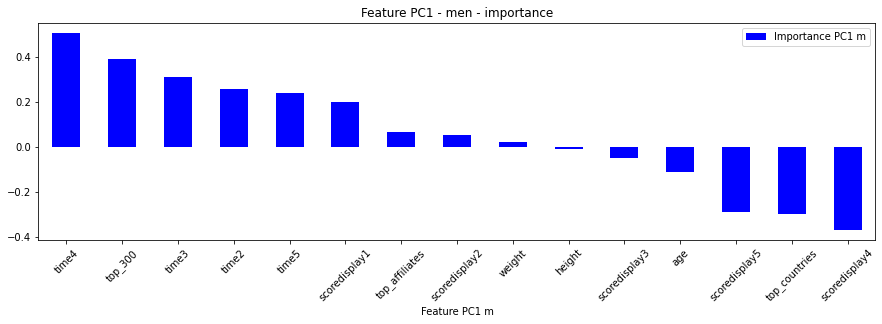

In [91]:
# make a plot - PC1 men
fig = plt.figure()
pc1_features_m.set_index('Feature PC1 m').sort_values(by='Importance PC1 m', ascending=False).plot(kind="bar", rot=45, color="blue", figsize=(15,4))
plt.title("Feature PC1 - men - importance")
plt.show()

PC2 comes with the negative sign, so the previous logic applies in an inverted fashion - the value of the component should be minimized by not falling too far away from the mean, should an athlete not shine in the large loadings to be able to boost PC1 and PC3. 

<Figure size 432x288 with 0 Axes>

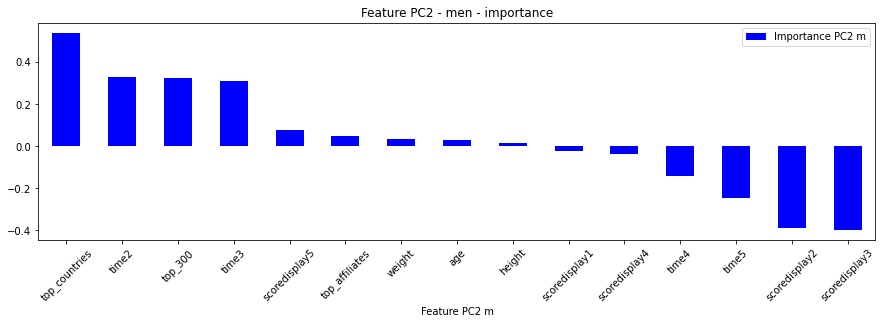

In [92]:
# make a plot - PC2 men
fig = plt.figure()
pc2_features_m.set_index('Feature PC2 m').sort_values(by='Importance PC2 m', ascending=False).plot(kind="bar", rot=45, color="blue", figsize=(15,4))
plt.title("Feature PC2 - men - importance")
plt.show()

<Figure size 432x288 with 0 Axes>

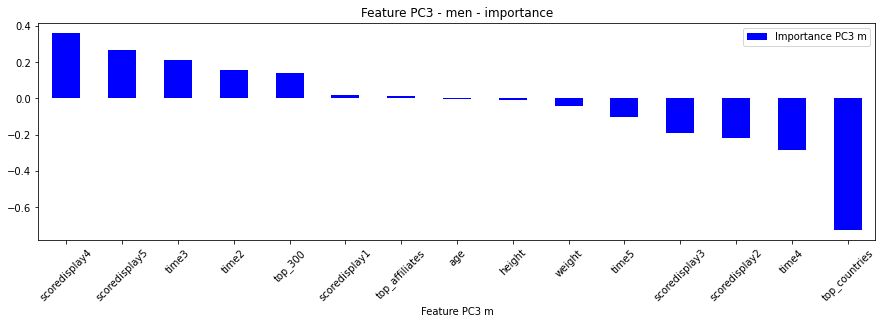

In [93]:
# make a plot - PC3 men
fig = plt.figure()
pc3_features_m.set_index('Feature PC3 m').sort_values(by='Importance PC3 m', ascending=False).plot(kind="bar", rot=45, color="blue", figsize=(15,4))
plt.title("Feature PC3 - men - importance")
plt.show()

PC3 seems to be a slightly modified version of PC1, and the same logic applies to its analysis.

The profile of an ideal male athlete who will be able to participate in the Games can be built by following a simple principal - maximize PC1 and PC3 and minimize PC2. How can this be done?

#### How to Get through the CrossFit Games Open and Get Selected to the Games (Men)

**What to do:** 

 - maximise performance in w/0 4 ('time4') which involves 3 rounds of 10 snatches, 12 bar-facing burpees, then 3 rounds of 10 bar muscle-ups, and 12 bar-facing burpees, all within 12 mins;
 - compete in as many opens and games as possible and consistently rank, leastwise, in the top 300 male athletes, because with experience the chances increase;
 - ace w/o 3 (200-ft. dumbbell overhead lunge, 50 dumbbell box step-ups, 50 strict handstand push-ups, 200-ft. handstand walk, 35-lb. dumbbell, 20-in. box) by performing as quickly as possible and within the 10 minutes interval ('time3');
 - ace w/o 2 within the time cap of 20 mins ('time2') by completing a complex training involving varies combinations of toes-to-bars, double-unders, squat cleans, double-unders, the quicker the better;
 - ace w/o 5 ('time5') involving consists of 33-27-21-15-9 reps for time of 65-lb. thrusters, chest-to-bar pull-ups, within the time cap of 20 mins;
 - ace w/o 1 ('scoredispla1') achieving the maximum possible number of reps in the 15 mins interval: 19 wall-ball shots and 19-cal. rows; 
 - be a member of a gym chain that has a history of producing games participants;
 - be taller than average (preferably, > 1.80 m);
 - have more muscle mass than the rest and be thus heavier (preferably, > 87 kg).

**What NOT to do:**

 - fail w/o 3 by either exceeding the time cap or not completing the program;
 - be an older folk;
 - complete w/o 5 fully but not pay enough attention to the speed, because the time minimisation is the goal, and the number of reps doesn’t matter much as long as the required number of reps is achieved ('scoredisplay5');
 - be from one of the countries providing high competition (not from the top 11 countries, and definitely not from the US or Canada);
 - fail to show your best in w/o 4 both in term of time and score (‘time4’, 'scoredisplay4').

If one is not too good in one of the above 'activities', he must not be too different from the average (not too old, not too light, not too short, not too slow, lift his assigned weight), then he will minimize the value in PC2, which can help him get to the Games still.

The maximization of variance for PC3 can be achieved following a slightly different strategy than for PC1, but PC1 has the highest weight in the decision (for men), so if one maximizes the variance for PC1, he then will not be hurt too much by PC2 and he might gain additional benefit from maximizing the variance in PC1 also for PC3. The analysis of PC3 reveals the same message, but, generally speaking, prioretizes scores vs. timing etc. However, the best performance in PC1 guarantees a great performance in PC3. 

Let's analyse the PCs for women.

<Figure size 432x288 with 0 Axes>

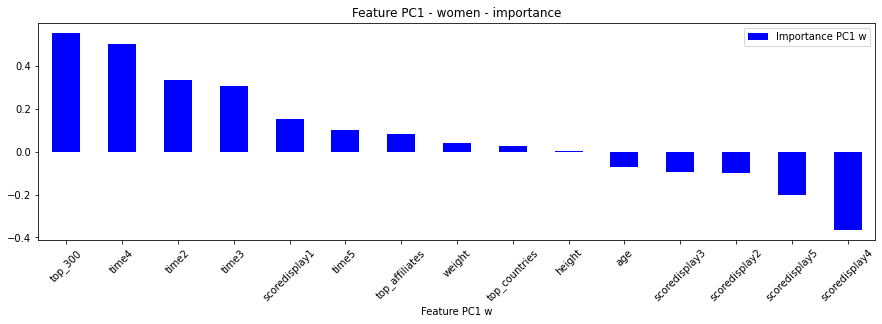

In [94]:
# make a plot - PC1 women
fig = plt.figure()
pc1_features_w.set_index('Feature PC1 w').sort_values(by='Importance PC1 w', ascending=False).plot(kind="bar", rot=45, color="blue", figsize=(15,4))
plt.title("Feature PC1 - women - importance")
plt.show()

<Figure size 432x288 with 0 Axes>

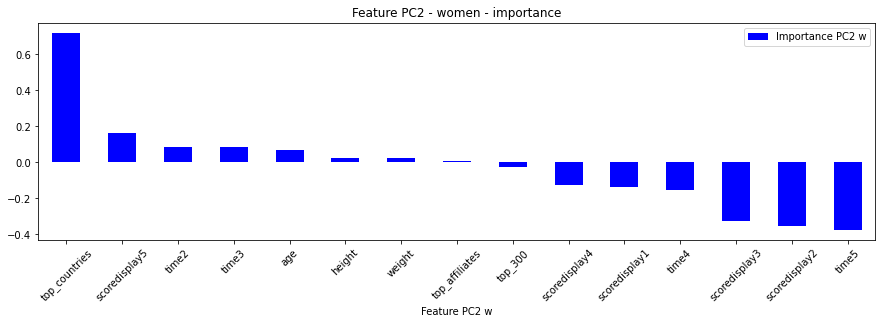

In [95]:
# make a plot - PC2 women
fig = plt.figure()
pc2_features_w.set_index('Feature PC2 w').sort_values(by='Importance PC2 w', ascending=False).plot(kind="bar", rot=45, color="blue", figsize=(15,4))
plt.title("Feature PC2 - women - importance")
plt.show()

<Figure size 432x288 with 0 Axes>

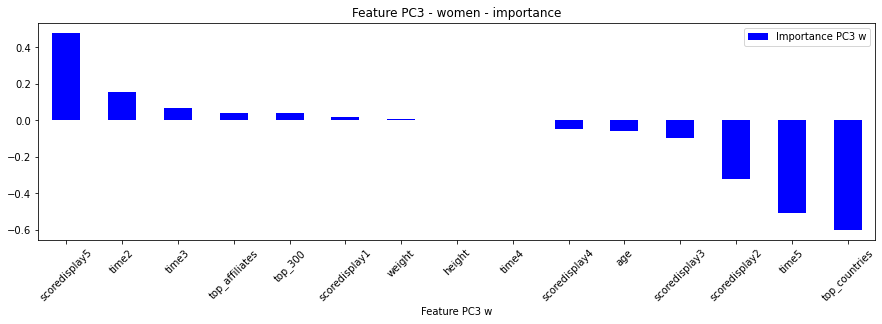

In [96]:
# make a plot - PC3 women
fig = plt.figure()
pc3_features_w.set_index('Feature PC3 w').sort_values(by='Importance PC3 w', ascending=False).plot(kind="bar", rot=45, color="blue", figsize=(15,4))
plt.title("Feature PC3 - women - importance")
plt.show()

The approach to establishing a winning strategy for female-athletes who want to get to the Games is slightly different than that for men, because the weights of the PCs are different in the regression model for women. PC2 for women seems to be the most impactful, and it happens to be a 'deterrent' for them, the negative component that 'makes them lose'. But the impact of PC3 is greater than it is for men; thus women should pursue the same PC1 and PC3 maximization strategy to get to the games.

### How to Get through the CrossFit Games Open and Get Selected to the Games (Women)

**What to do:**

 - Have a strong record of participating in the previous opens and/or games; 
 - Focus on completing the workouts as quickly as possible, prioritize the time, not the reps, as long as the minimum reps requirement is met;
 - Be more muscular than others;
 - Train at a top gym that has a history of producing winning CrossFit ladies;
 - Be from one of the countries where CrossFit is popular (top_countries);
 - Be on the younger side.
 
Similar to men, if some of the above conditions are not satisfied, a female competitor should strive to not be too far from the average to minimize the value of PC2 and not get penalized too badly.

There is more similarity between the structures of PC1 and PC2 for women, then for men.

If the above conditions are not satisfied, she should strive to not be too far from the average to minimize the value for PC2.

If a woman is from a top country, she should give her all to reps in w/0 5 (as long as she meets the time cap) to maximize the value in PC3. 




This concludes the analysis. Have a nice day!